Import des librairies:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


 # Nettoyage des données Projet Immo

## Import des données

In [2]:
immo_df = pd.read_csv("immo.csv", delimiter=",")

In [3]:
immo_df

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

Explication des differentes colonnes: 
1.	**longitude**
2.	**latitude**
3.	**housingMedianAge**: Âge médian d'une maison dans un pâté de maisons ; un chiffre plus bas correspond à un bâtiment plus récent.
4.	**totalRooms**: Nombre total de chambres dans un bloc
5.	**totalBedrooms**: Nombre total de chambres dans un bloc
6.	**population**: Nombre total de personnes résidant dans un bloc
7.	**households**: Nombre total de ménages, c'est-à-dire un groupe de personnes résidant dans une unité d'habitation, pour un bloc
8.	**medianIncome**: Revenu médian des ménages dans un bloc de maisons (mesuré en dizaines de milliers de dollars US)
9.	**medianHouseValue**: Valeur médiane des maisons pour les ménages d'un bloc (mesurée en dollars US)
10.	**oceanProximity**: Situation de la maison par rapport à la mer


## Exploration des données 

### Observation des données

In [4]:
immo_df.shape

(16512, 11)

Le df contients 11 colonnes et 16512 lignes

In [5]:
immo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16336 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


On peut observer que pour la majorité des colonnes il n'y a pas de données manquante ( 16512 lignes remplis) sauf pour total_bedrooms. On peut aussi observer que la majorité des colonnes sont des nombres sauf la colonnes Ocean_proximity.

### La colonne Unnamed

La colonne unnamed ne faisait pas partie du descriptif des colonnes. 

In [6]:
immo_df.duplicated(['Unnamed: 0']).value_counts()

False    16512
dtype: int64

La colonne Unnamed: 0 ne contient que des valeurs unique, cette colonne doit correspondre à un index

In [7]:
immo_df.rename(columns = {'Unnamed: 0':'index'}, inplace = True)
immo_df

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

### Observation des colonnes longitude et lattitude

Dans un premier temps j'ai chercher à observer un peu la localisation en fonction d'autre parametre. J'ai par exemple regardé le nombre total de menage en fonction de la localisation (longitude/latitude)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

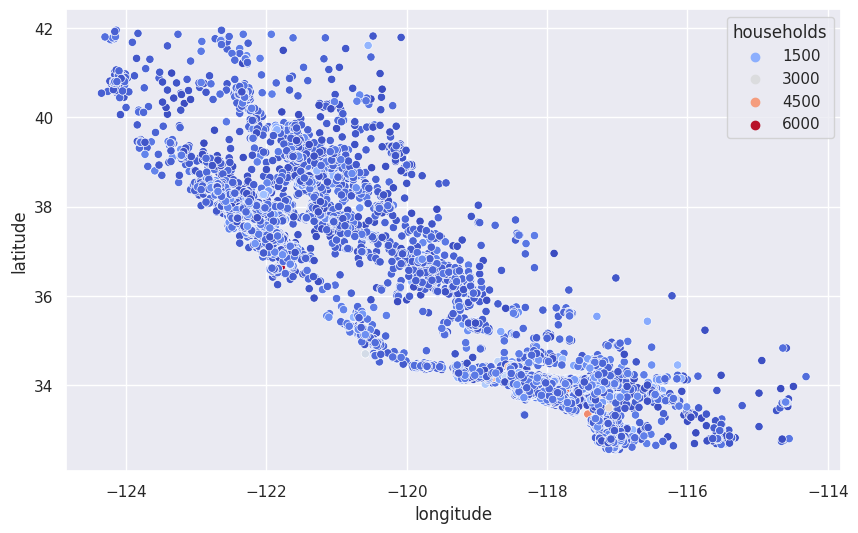

In [8]:
sns.set(style="darkgrid",rc={'figure.figsize':(10,6)})
sns.scatterplot(x=immo_df["longitude"], y=immo_df['latitude'], hue= immo_df['households'],palette= 'coolwarm')

On peut deja observé que les points sont repartie majoritairement sur une même zones. Il est difficile a l'oeil d'affirmer quoi que ce soit car les points se superpose. 
J'ai ensuite regarder le salaire moyen toujours en fonction de la longitude et latitude.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

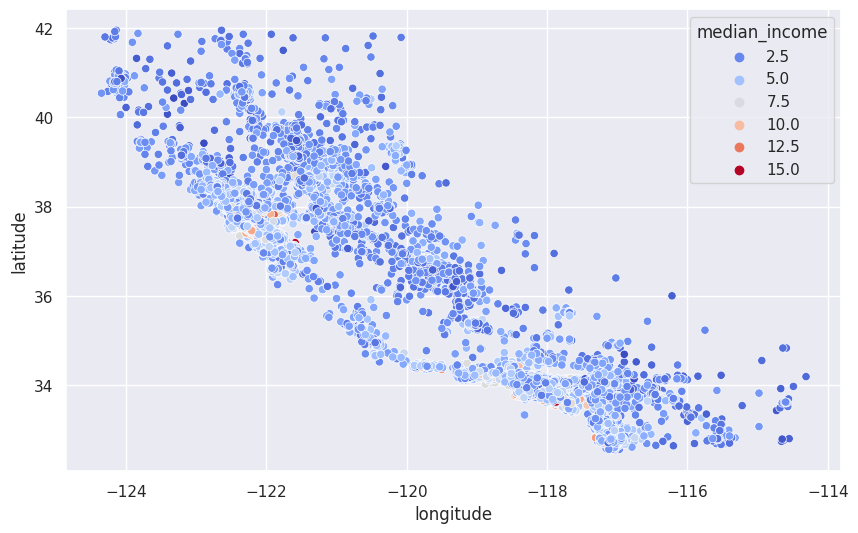

In [9]:
sns.set(style="darkgrid",rc={'figure.figsize':(10,6)}, palette = "Set1")
sns.scatterplot(x=immo_df["longitude"], y=immo_df['latitude'], hue= immo_df['median_income'],palette= 'coolwarm')


On peut observer deux zones a plus fort income vers -118 et une autre vers -122 de longitude.
J'ai ensuite regarder le prix des maisons en fonction de leur localisation

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

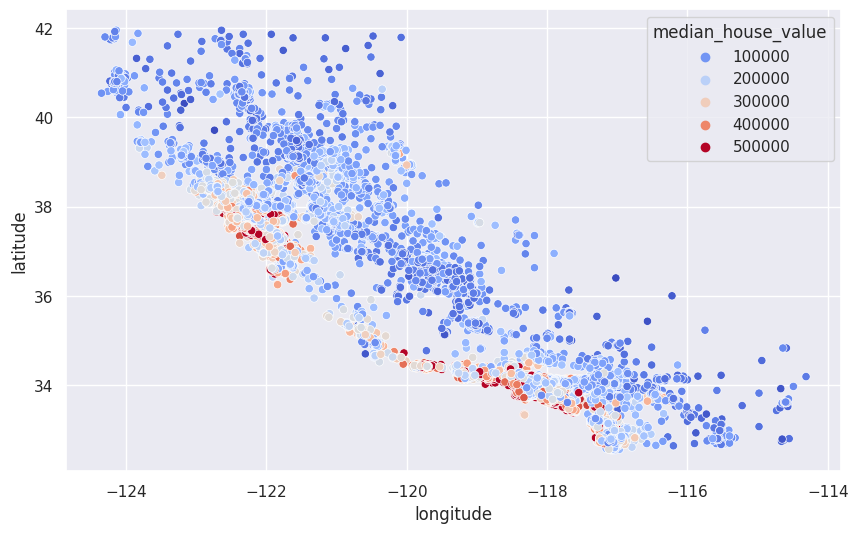

In [10]:
sns.set(style="darkgrid",rc={'figure.figsize':(10,6)})
sns.scatterplot(x=immo_df["longitude"], y=immo_df['latitude'], hue= immo_df['median_house_value'],palette= "coolwarm")

On peut observer que le prix de l'immobilier semble relativement entre 10000 et 200000 sauf sur les zones -122 longitude/38 latitude et -118 longitude/34 latitude.

### Données dupliqué 

Dans un premier temps j'ai voulu determiner s'il y avait presence de dublon. Ce qui n'est pas le cas.

In [11]:
immo_df.duplicated().sum()

0

Il ne semble pas y avoir de duplicated mais je vais verifier s'il y a des doublon de localisation.

In [12]:
duplicate = immo_df[immo_df.duplicated(subset=['longitude','latitude'], keep= False)]
duplicate.sort_values(by= ['longitude'], ascending= False)


index  longitude  latitude  housing_median_age  total_rooms  \
11750   2696    -115.37     32.82                14.0       1276.0   
11563   2700    -115.37     32.81                32.0        741.0   
1438    2695    -115.37     32.81                23.0       1458.0   
9183    2697    -115.37     32.82                30.0       1602.0   
9440    2677    -115.52     32.98                32.0       1615.0   
...      ...        ...       ...                 ...          ...   
7973    2541    -124.17     40.80                52.0       1606.0   
3625    2553    -124.18     40.78                37.0       1453.0   
4808    2554    -124.18     40.78                33.0       1076.0   
12559   2548    -124.18     40.79                40.0       1398.0   
393     2547    -124.18     40.79                39.0       1836.0   

       total_bedrooms  population  households  median_income  \
11750           270.0       867.0       261.0         1.9375   
11563           191.0       623.0       169.0         1.7604   
1438            294.0       866.0       275.0         2.3594   
9183            322.0      1130.0       335.0         3.5735   
9440            382.0      1307.0       345.0         1.4583   
...               ...         ...         ...            ...   
7973            419.0       891.0       367.0         1.5850   
3625            293.0       867.0       310.0         2.5536   
4808            222.0       656.0       236.0         2.5096   
12559           311.0       788.0       279.0         1.4668   
393             352.0       883.0       337.0         1.7450   

       median_house_value ocean_proximity  
11750             80900.0          INLAND  
11563             68600.0          INLAND  
1438              74300.0          INLAND  
9183              71100.0          INLAND  
9440              58600.0          INLAND  
...                   ...             ...  
7973              75500.0      NEAR OCEAN  
3625              70200.0      NEAR OCEAN  
4808              72200.0      NEAR OCEAN  
12559             64600.0      NEAR OCEAN  
393               70500.0      NEAR OCEAN  

[9081 rows x 11 columns]

In [13]:
visu_test= duplicate.loc[duplicate.longitude == -124.18]
visu_test

index  longitude  latitude  housing_median_age  total_rooms  \
393     2547    -124.18     40.79                39.0       1836.0   
3625    2553    -124.18     40.78                37.0       1453.0   
4808    2554    -124.18     40.78                33.0       1076.0   
12559   2548    -124.18     40.79                40.0       1398.0   

       total_bedrooms  population  households  median_income  \
393             352.0       883.0       337.0         1.7450   
3625            293.0       867.0       310.0         2.5536   
4808            222.0       656.0       236.0         2.5096   
12559           311.0       788.0       279.0         1.4668   

       median_house_value ocean_proximity  
393               70500.0      NEAR OCEAN  
3625              70200.0      NEAR OCEAN  
4808              72200.0      NEAR OCEAN  
12559             64600.0      NEAR OCEAN

On observe bien la repetition de longitude et latitude identique dans le df. On observe que le reste des lignes est par contre differents.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

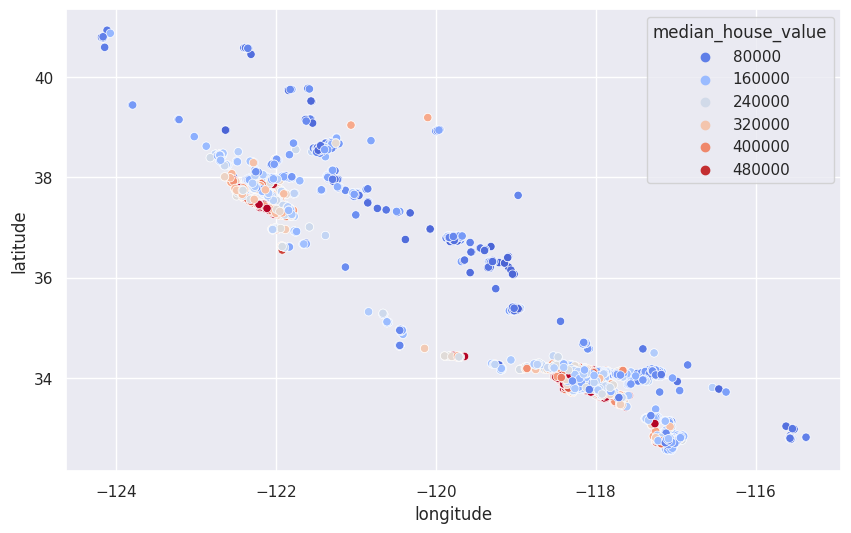

In [14]:
sns.set(style="darkgrid",rc={'figure.figsize':(10,6)})
sns.scatterplot(x=duplicate["longitude"], y=duplicate['latitude'], hue= duplicate['median_house_value'],palette= "coolwarm")

Je vais chercher a s'avoir s'ils a des vrai doublon ou non grace a une libraire (reverse_geocoder). 

In [15]:
import reverse_geocoder as revgc

In [16]:
revgc.search((32.82, -115.52))

Loading formatted geocoded file...


[{'lat': '32.792',
  'lon': '-115.56305',
  'name': 'El Centro',
  'admin1': 'California',
  'admin2': 'Imperial County',
  'cc': 'US'}]

Bien que la longitude et la latitude sont identique, il corresponde a des zones geographique trop etendu pour correspondre a des duplicat.

### Données manquante : Total Bedrooms

In [17]:
immo_df.isnull().sum()

index                   0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

On oberserve 176 données manquante pour total_bedrooms.

In [18]:
immo_df['total_bedrooms'].isnull().value_counts()

False    16336
True       176
Name: total_bedrooms, dtype: int64

(176 NA sur 16512)

In [19]:
null = immo_df.loc[immo_df['total_bedrooms'].isnull()]
null

index  longitude  latitude  housing_median_age  total_rooms  \
33      5723    -118.23     34.18                45.0       2332.0   
171     2578    -124.06     40.86                34.0       4183.0   
178    10033    -121.08     39.22                30.0       2188.0   
179    19485    -120.98     37.66                10.0        934.0   
259    19766    -122.10     40.03                25.0       2516.0   
...      ...        ...       ...                 ...          ...   
16002  17202    -119.73     34.44                38.0       1729.0   
16089  17041    -122.28     37.51                33.0       4719.0   
16214   4591    -118.28     34.06                42.0       2472.0   
16228   9942    -122.23     38.17                45.0        350.0   
16323   2301    -119.78     36.82                25.0       5016.0   

       total_bedrooms  population  households  median_income  \
33                NaN       943.0       339.0         8.1132   
171               NaN      1891.0       669.0         3.2216   
178               NaN      1033.0       437.0         2.1419   
179               NaN       401.0       255.0         0.9336   
259               NaN      1266.0       494.0         1.7566   
...               ...         ...         ...            ...   
16002             NaN       801.0       395.0         3.1364   
16089             NaN      1980.0       757.0         6.1064   
16214             NaN      3795.0      1179.0         1.2254   
16228             NaN       225.0        72.0         1.8942   
16323             NaN      2133.0       928.0         3.6250   

       median_house_value ocean_proximity  
33               446600.0       <1H OCEAN  
171               98100.0      NEAR OCEAN  
178              105200.0          INLAND  
179              127100.0          INLAND  
259               58400.0          INLAND  
...                   ...             ...  
16002            357500.0      NEAR OCEAN  
16089            405000.0      NEAR OCEAN  
16214            162500.0       <1H OCEAN  
16228            216700.0        NEAR BAY  
16323             89500.0          INLAND  

[176 rows x 11 columns]

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

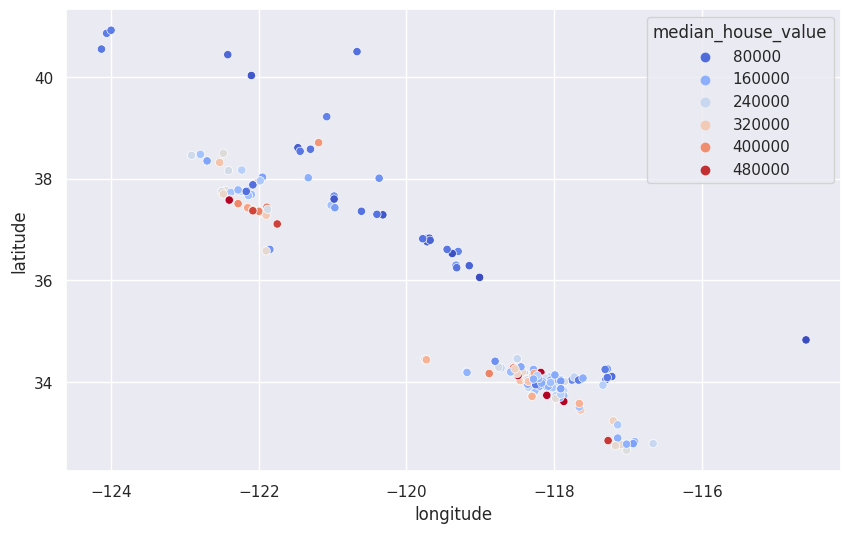

In [20]:
sns.set(style="darkgrid",rc={'figure.figsize':(10,6)})
sns.scatterplot(x=null["longitude"], y=null['latitude'], hue= null['median_house_value'],palette= "coolwarm")

Les données manquantes ne sont pas reunis toute sur une localisation particuliere ou a un niveau de prix equivalent. 

<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

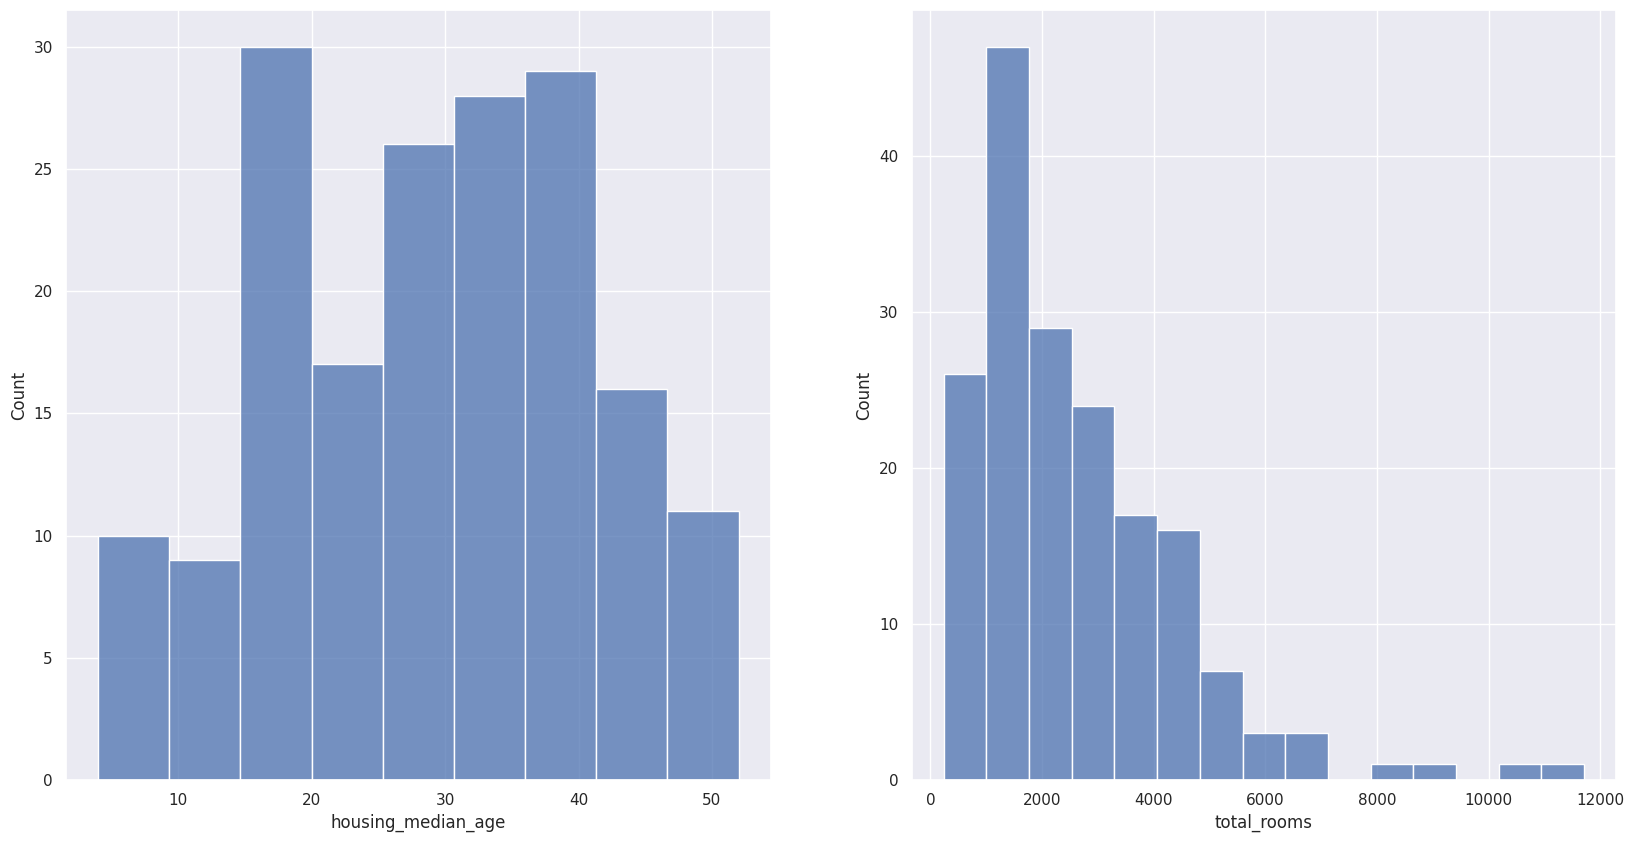

In [21]:
sns.set(rc={"figure.figsize":(20,10)},style='darkgrid')
fig, ax =plt.subplots(1,2)
sns.histplot(x=null["housing_median_age"], ax=ax[0])
sns.histplot(x=null["total_rooms"], ax=ax[1])



Les données manquante ne semble pas non plus correspondre a un type ou d'age  d'habitation particuliére. 

Imputation ? suppression ? Realisation d'une veille pour choisir quel technique me semble le plus addapté a la situation. Données qui seront potentiellement reprise lors de la prochaine iteration de nettoyage si le choix ne conviens pas. 

### Remplacement des données par 0

In [22]:
immo_df.isnull().mean()*100

index                 0.000000
longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.065891
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

Ici les donnée manquante ne represente que 1% des donnée, pour le premier model je decide de remplacé les Na par des 0 (ce qui permettra au modéle de fonctionné). 

In [23]:
immo_sans_NA= immo_df.copy()

In [24]:
immo_sans_NA['total_bedrooms'].fillna(0, inplace=True)
immo_sans_NA

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

### Observation descriptive des données

In [25]:
dexcription = immo_sans_NA[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]
dexcription.describe()

housing_median_age   total_rooms  total_bedrooms    population  \
count        16512.000000  16512.000000    16512.000000  16512.000000   
mean            28.624516   2644.170603      533.570979   1435.017260   
std             12.597980   2213.946369      426.546337   1158.151967   
min              1.000000      6.000000        0.000000      3.000000   
25%             18.000000   1446.000000      292.000000    788.000000   
50%             29.000000   2116.000000      431.000000   1168.000000   
75%             37.000000   3154.000000      644.000000   1738.000000   
max             52.000000  39320.000000     6445.000000  35682.000000   

         households  median_income  median_house_value  
count  16512.000000   16512.000000        16512.000000  
mean     501.135962       3.864091       206509.251453  
std      385.650673       1.893244       115225.957661  
min        2.000000       0.499900        14999.000000  
25%      280.000000       2.562500       119400.000000  
50%      410.000000       3.531300       179300.000000  
75%      606.000000       4.733225       264500.000000  
max     6082.000000      15.000100       500001.000000

Il ne semble pas avoir de donnée aberente identifiable. 

<AxesSubplot:>

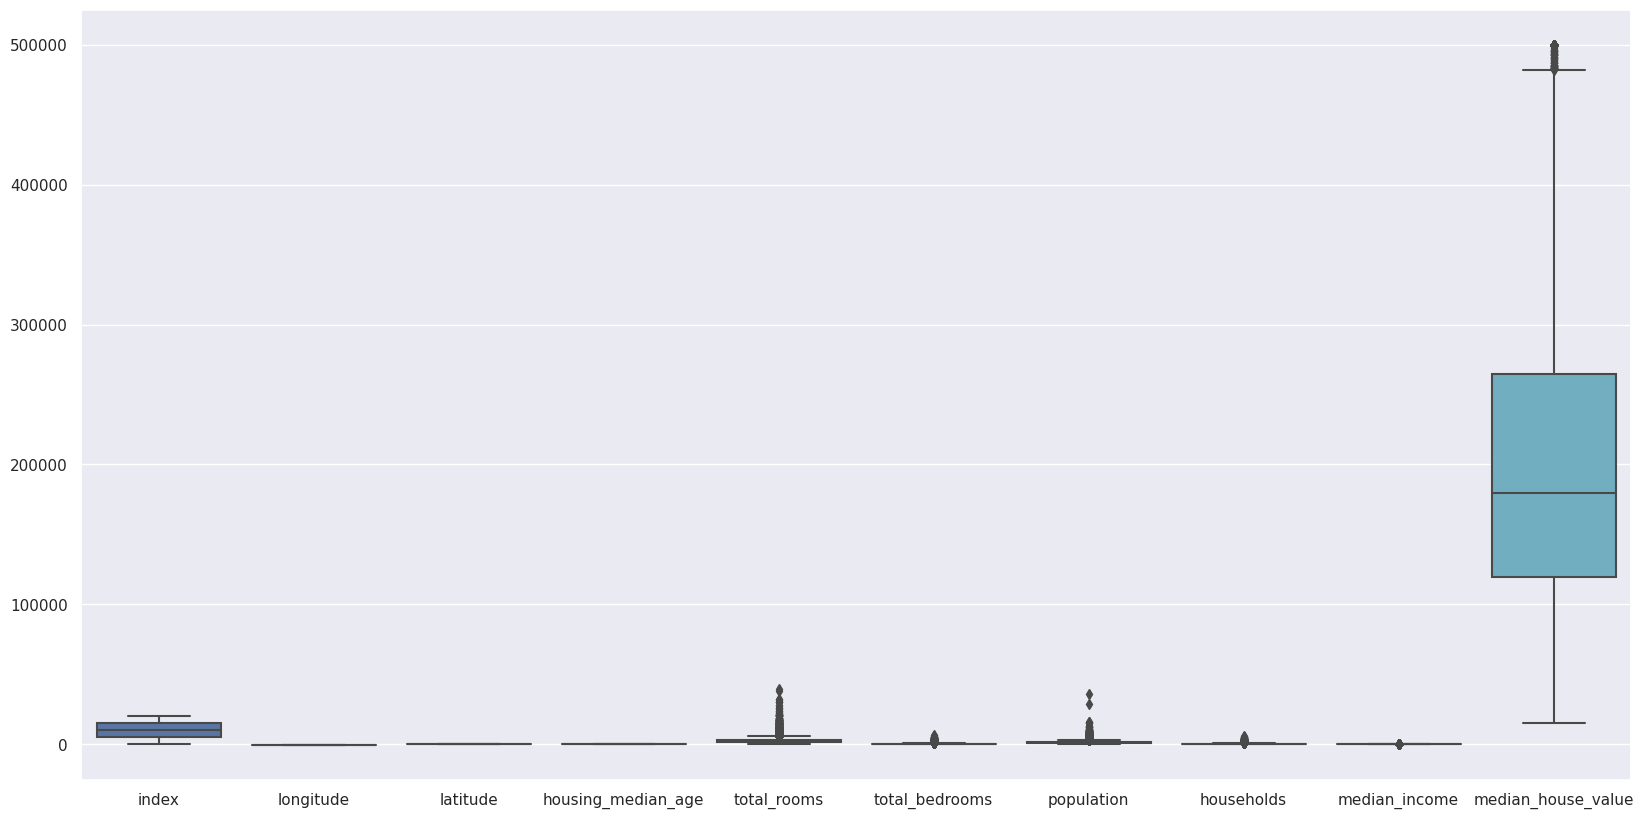

In [26]:
plt.figure(figsize=(20,10))
sns.boxplot(data=immo_df)

J'ai voulu observer la repartition des données grace à une boite a moustache. 

<AxesSubplot:ylabel='median_income'>

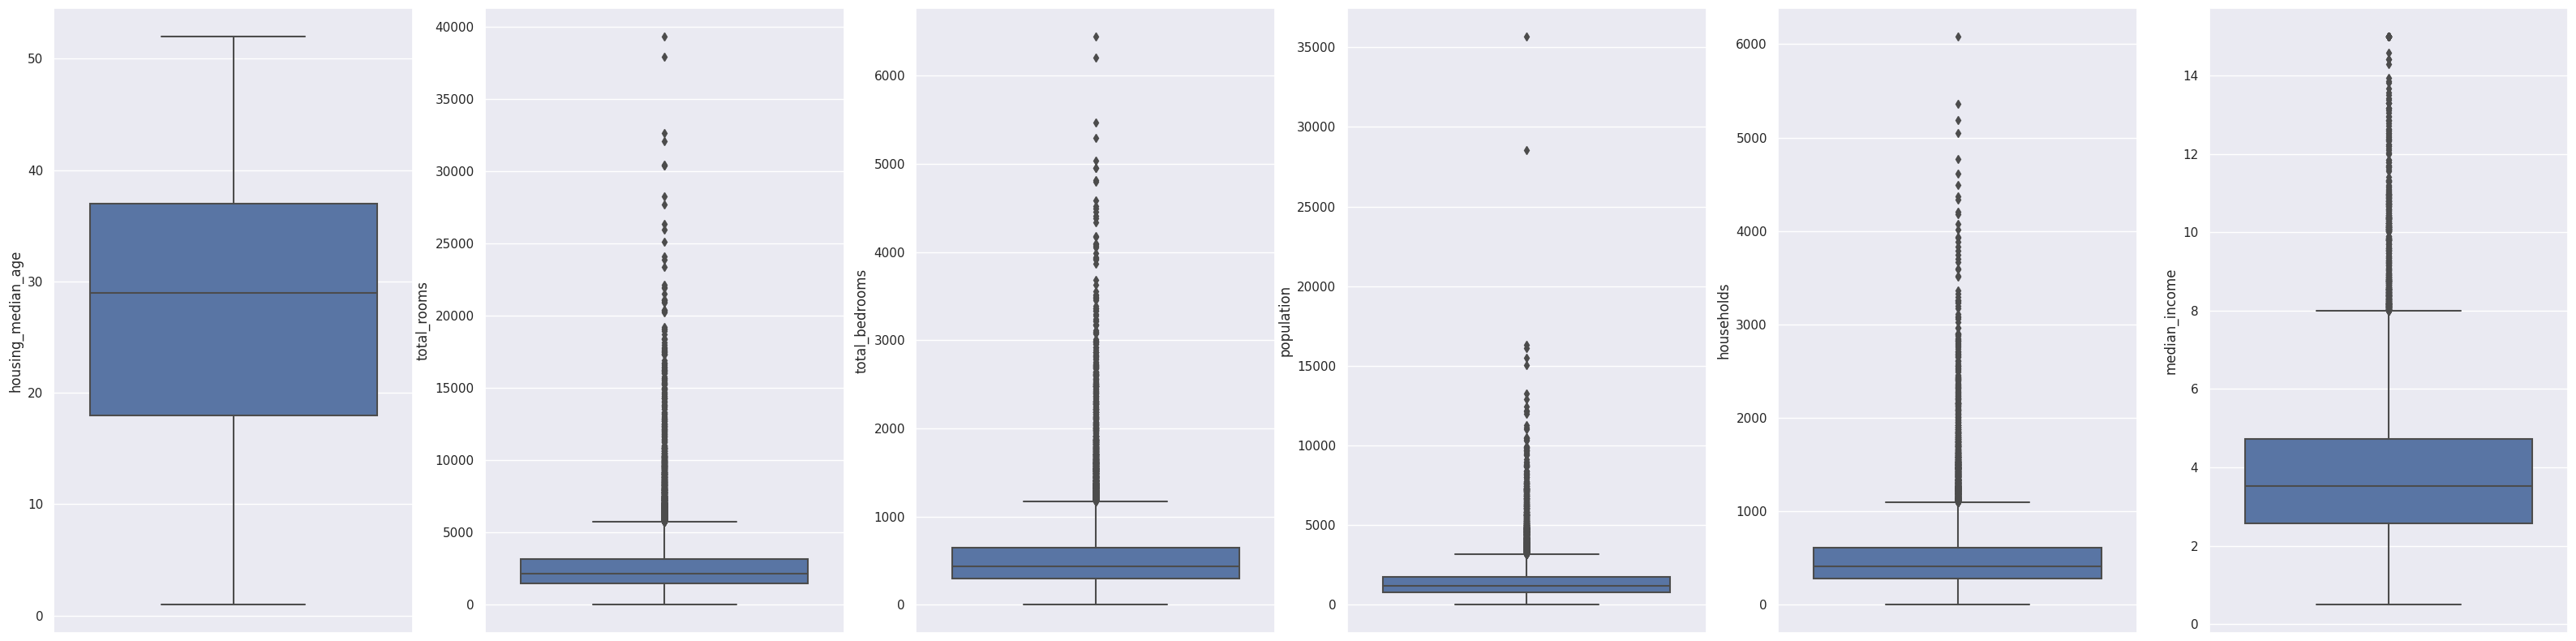

In [27]:
sns.set(rc={"figure.figsize":(40,10)})
fig, ax =plt.subplots(1,6)
sns.boxplot(y=immo_df["housing_median_age"], ax=ax[0])
sns.boxplot(y=immo_df["total_rooms"], ax=ax[1])
sns.boxplot(y=immo_df["total_bedrooms"], ax=ax[2])
sns.boxplot(y=immo_df["population"], ax=ax[3])
sns.boxplot(y=immo_df["households"], ax=ax[4])
sns.boxplot(y=immo_df["median_income"], ax=ax[5])

On peut observer la Presence d'outlier pour la plus part des catégorie. 

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

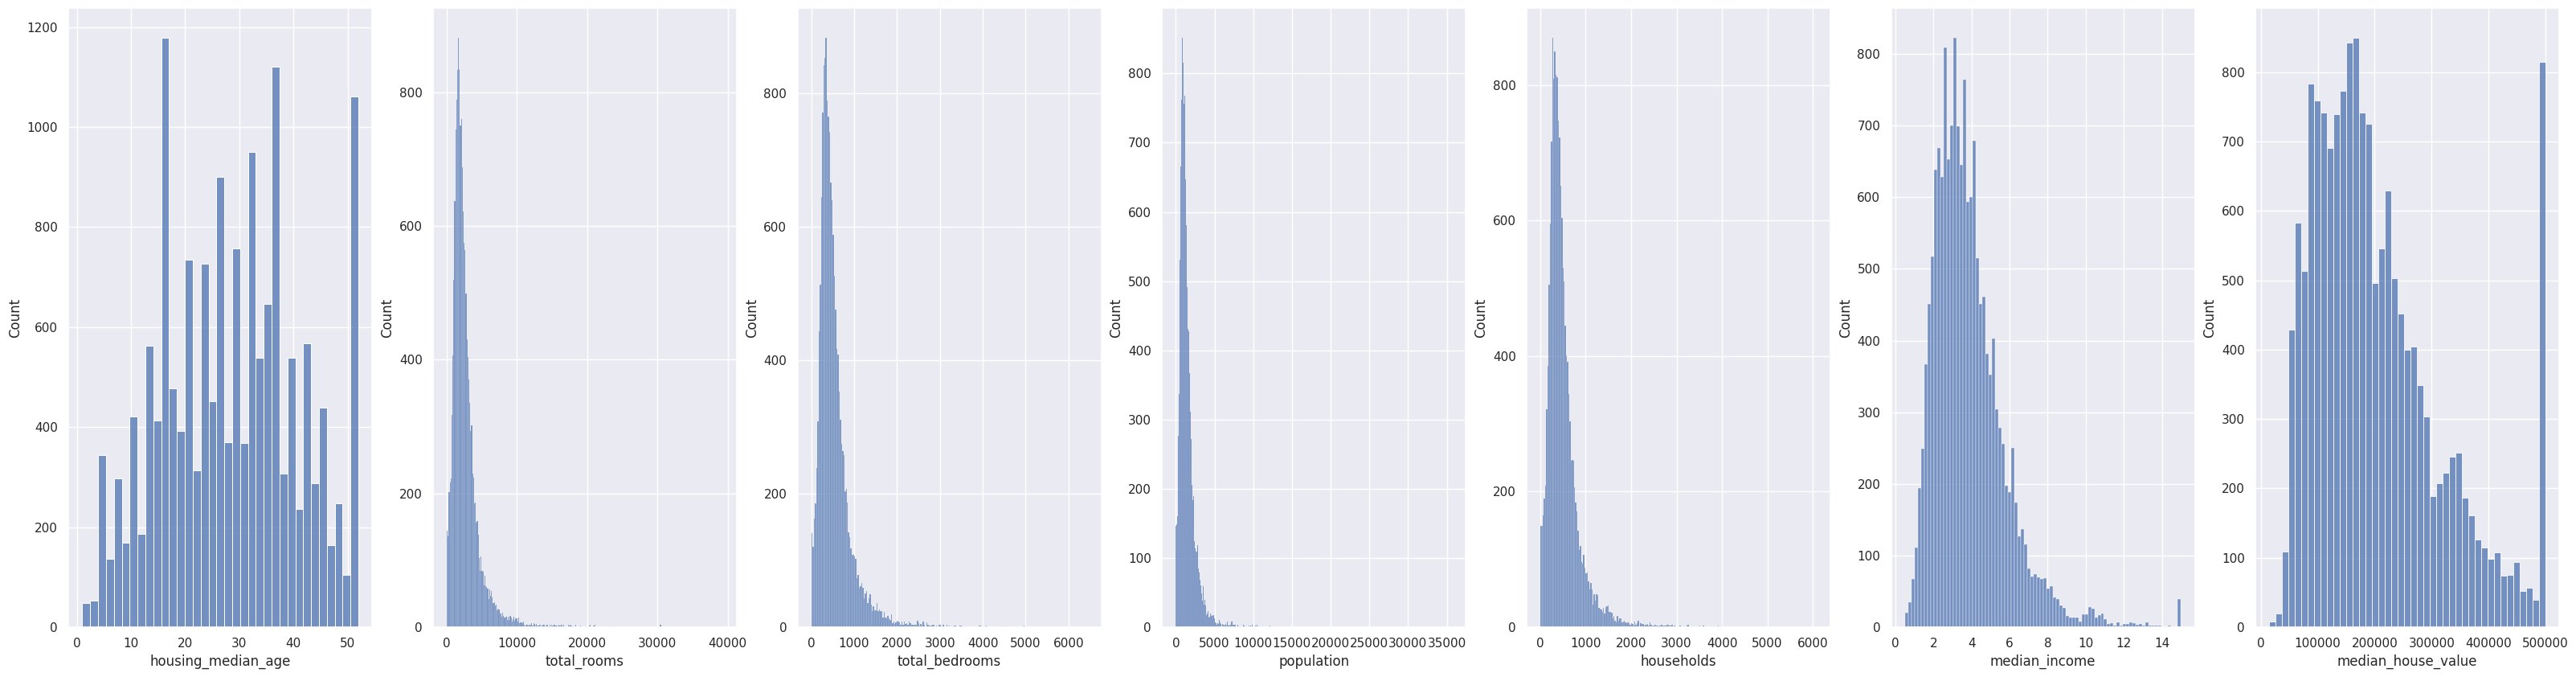

In [28]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,7)
sns.histplot(x=immo_df["housing_median_age"], ax=ax[0])
sns.histplot(x=immo_df["total_rooms"], ax=ax[1])
sns.histplot(x=immo_df["total_bedrooms"], ax=ax[2])
sns.histplot(x=immo_df["population"], ax=ax[3])
sns.histplot(x=immo_df["households"], ax=ax[4])
sns.histplot(x=immo_df["median_income"], ax=ax[5])
sns.histplot(x=immo_df["median_house_value"], ax=ax[6])

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

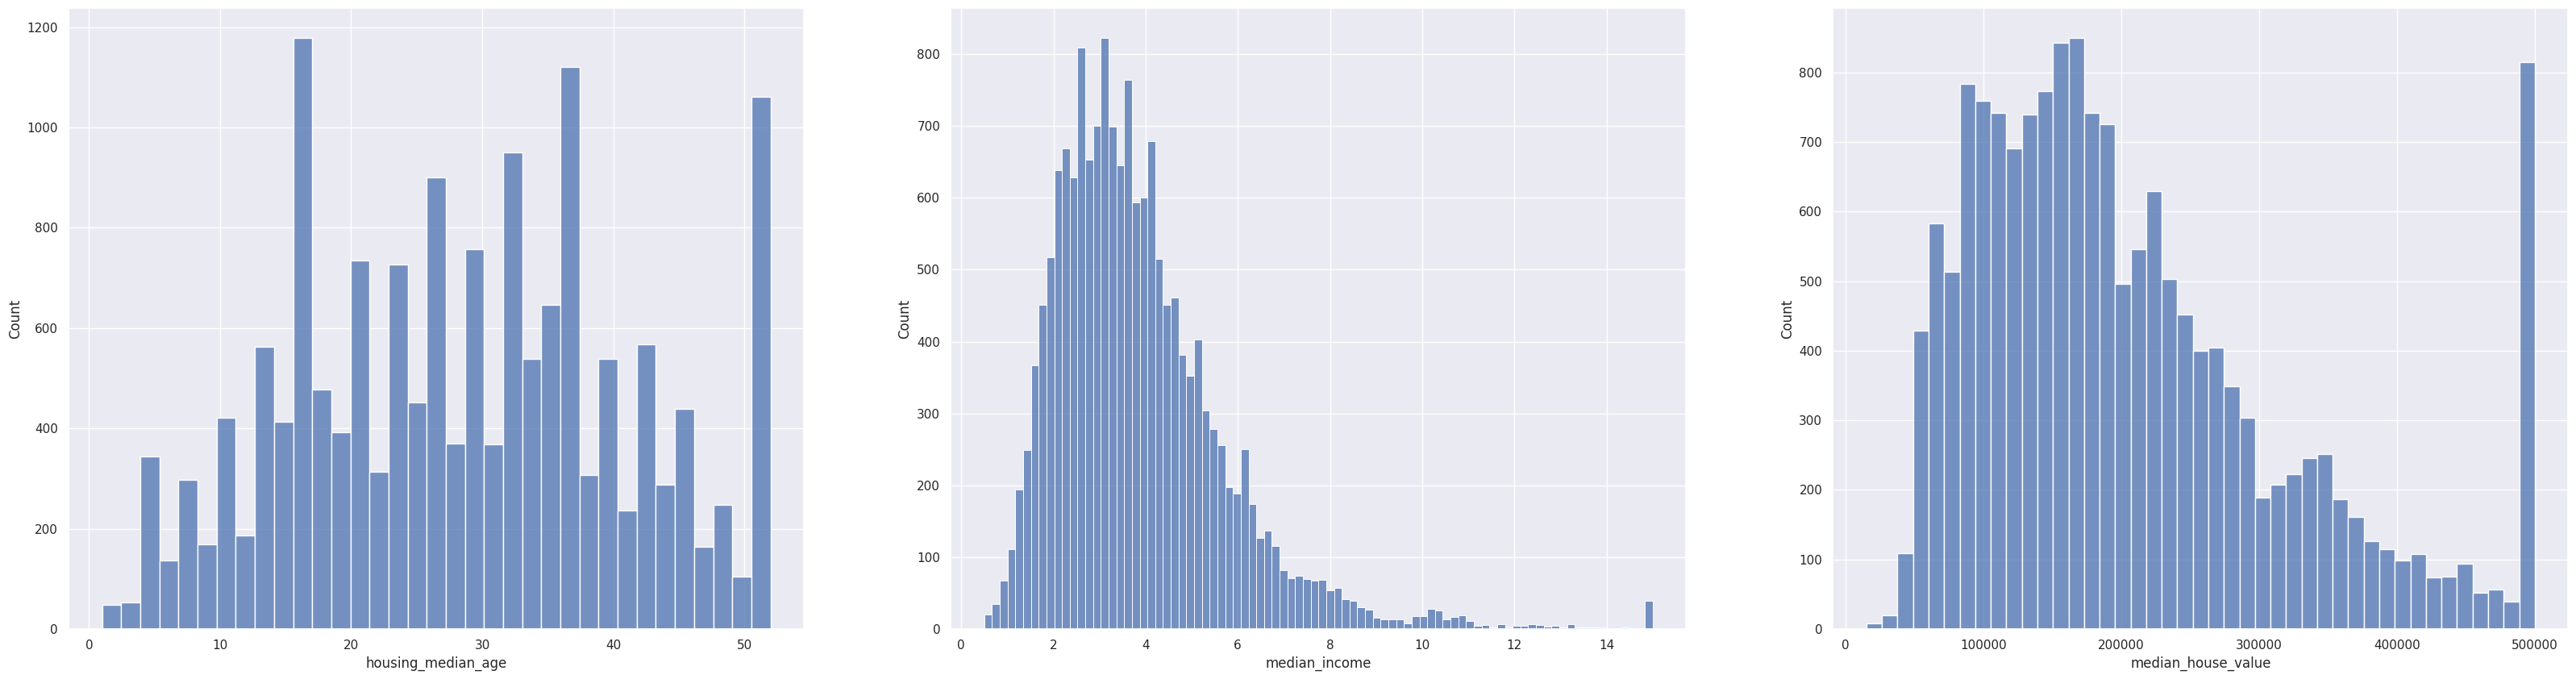

In [29]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,3)
sns.histplot(x=immo_df["housing_median_age"], ax=ax[0])
sns.histplot(x=immo_df["median_income"], ax=ax[1])
sns.histplot(x=immo_df["median_house_value"], ax=ax[2])

On observe notament un pique de l'age des maison aprés 50. On peut imaginer que nous n'avons pas les vraies ages des maisons de plus de 52 ans.

## Export des données: Base line

Ce jeu de données corespondra donc a ma base line. 

In [30]:
immo_sans_NA.to_csv('base_line.csv',index=False, encoding='utf-8')

 # Second Iteration

## transformation de la colonne ocean_proximity

In [31]:
immo_df.ocean_proximity.value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [32]:
immo_df['localisation'] = immo_df.ocean_proximity.apply(lambda x: 
                                            4 if x == 'INLAND'
                                            else 3 if x== '<1H OCEAN'
                                            else 2 if x == 'NEAR BAY'
                                            else 1 if x == 'NEAR OCEAN'
                                            else 0 )
immo_df


index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  localisation  
0                 72000.0          INLAND             4  
1                274100.0       <1H OCEAN             3  
2                 58300.0          INLAND             4  
3                200000.0       <1H OCEAN             3  
4                117900.0          INLAND             4  
...                   ...             ...           ...  
16507             93800.0          INLAND             4  
16508            103100.0        NEAR BAY             2  
16509            192600.0          INLAND             4  
16510            153500.0       <1H OCEAN             3  
16511             81100.0      NEAR OCEAN             1  

[16512 rows x 12 columns]

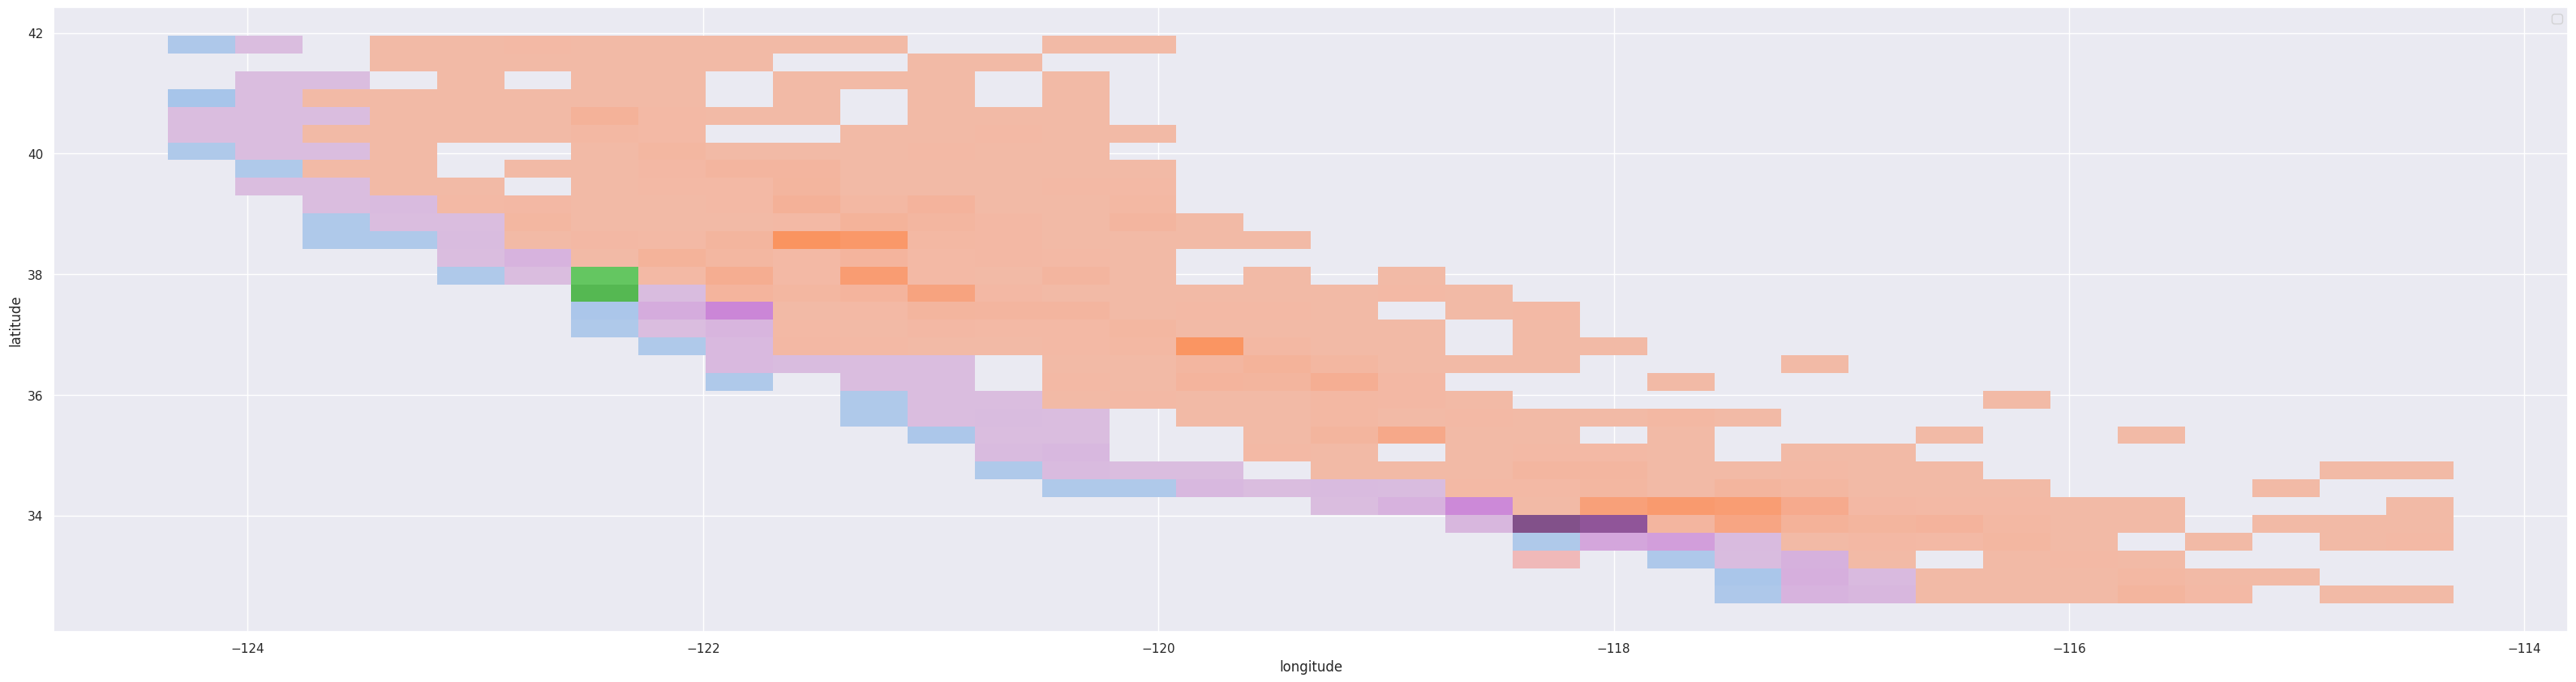

In [33]:
sns.histplot(x=immo_df["longitude"], y=immo_df['latitude'], hue= immo_df['localisation'], palette = 'Set1' )
plt.legend(labels=['ISLAND','NEAR OCEAN','NEAR BAY','<1H OCEAN','INLAND'])
plt.show()

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

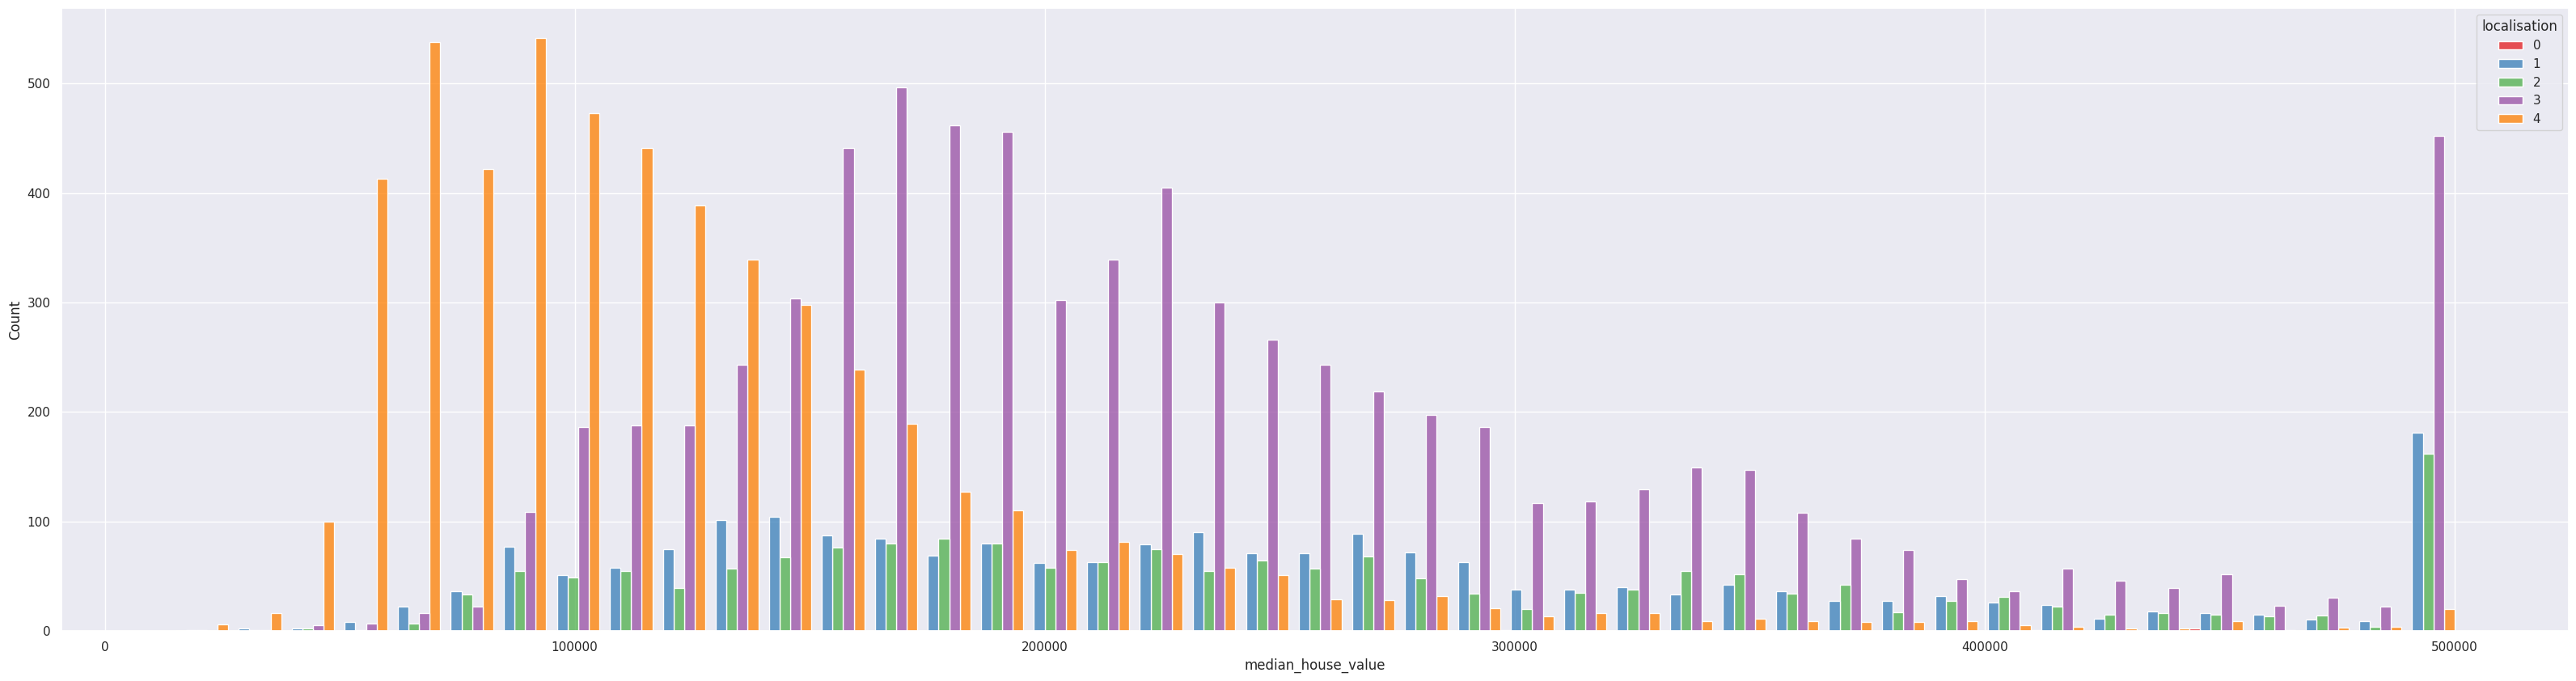

In [34]:
sns.histplot(x=immo_df["median_house_value"], hue= immo_df['localisation'], multiple ="dodge", palette = "Set1")

<AxesSubplot:xlabel='population', ylabel='Count'>

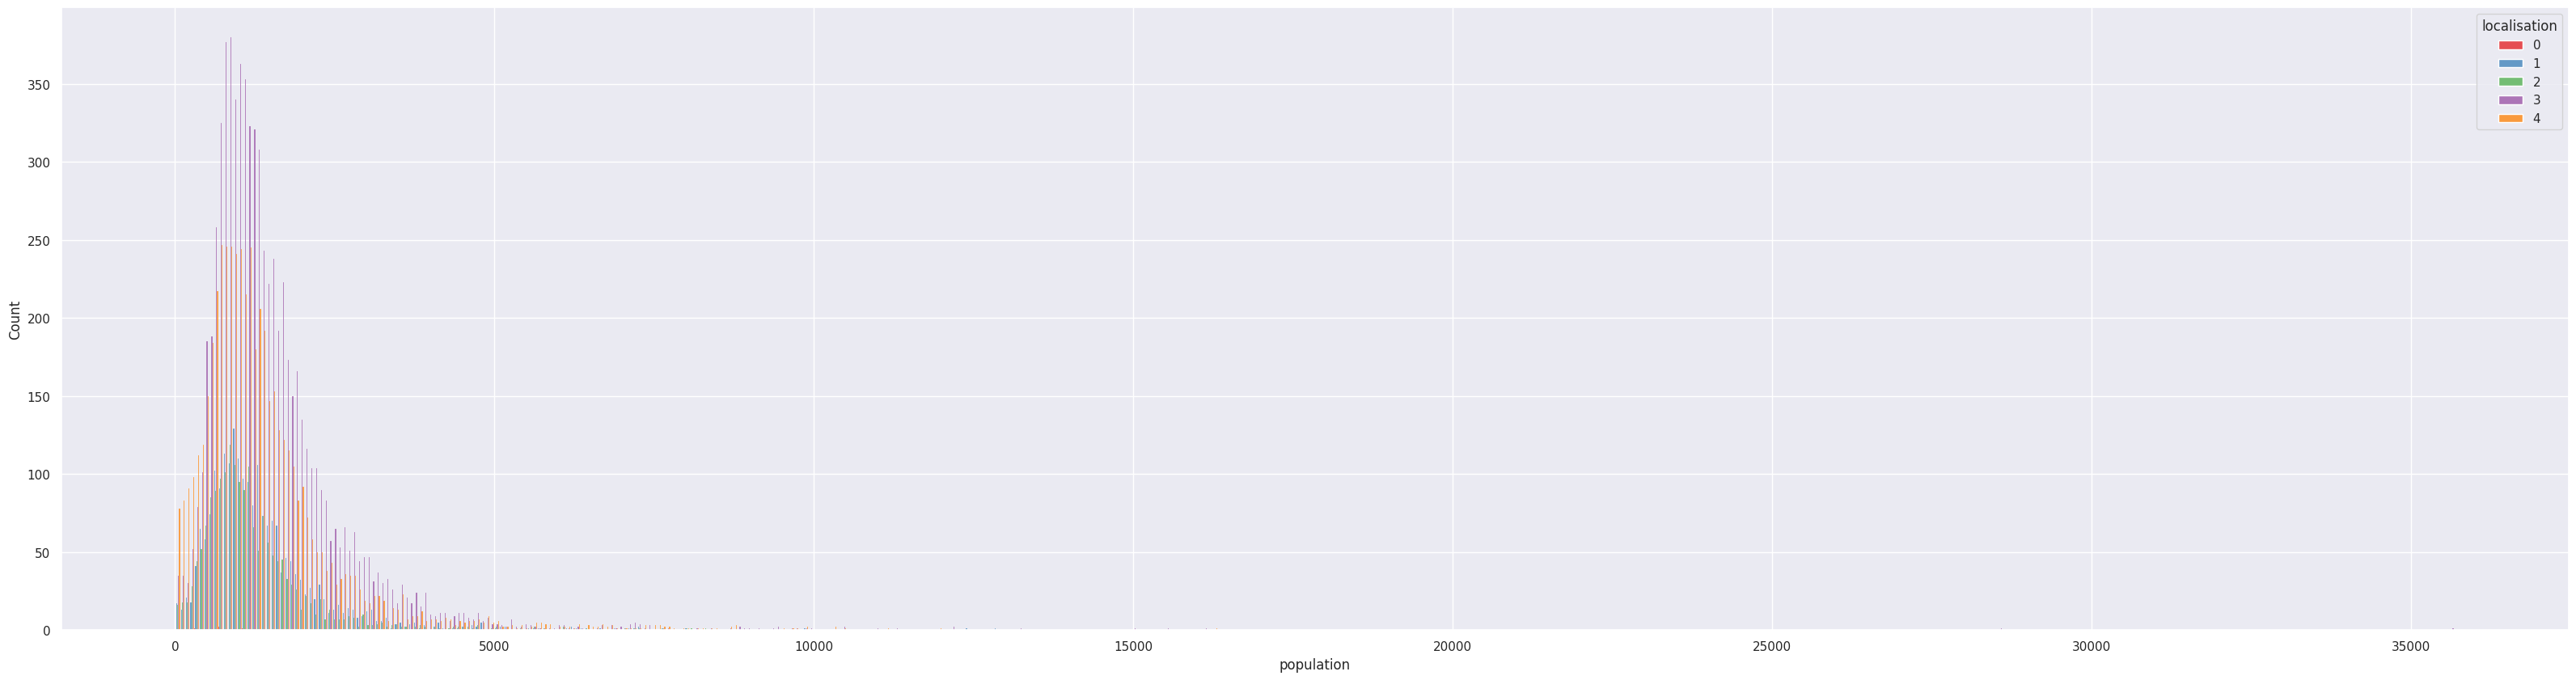

In [35]:
sns.histplot(x=immo_df["population"], hue= immo_df['localisation'], multiple ="dodge", palette = "Set1")

In [36]:
feature_localisation= immo_df[['housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value','localisation']]

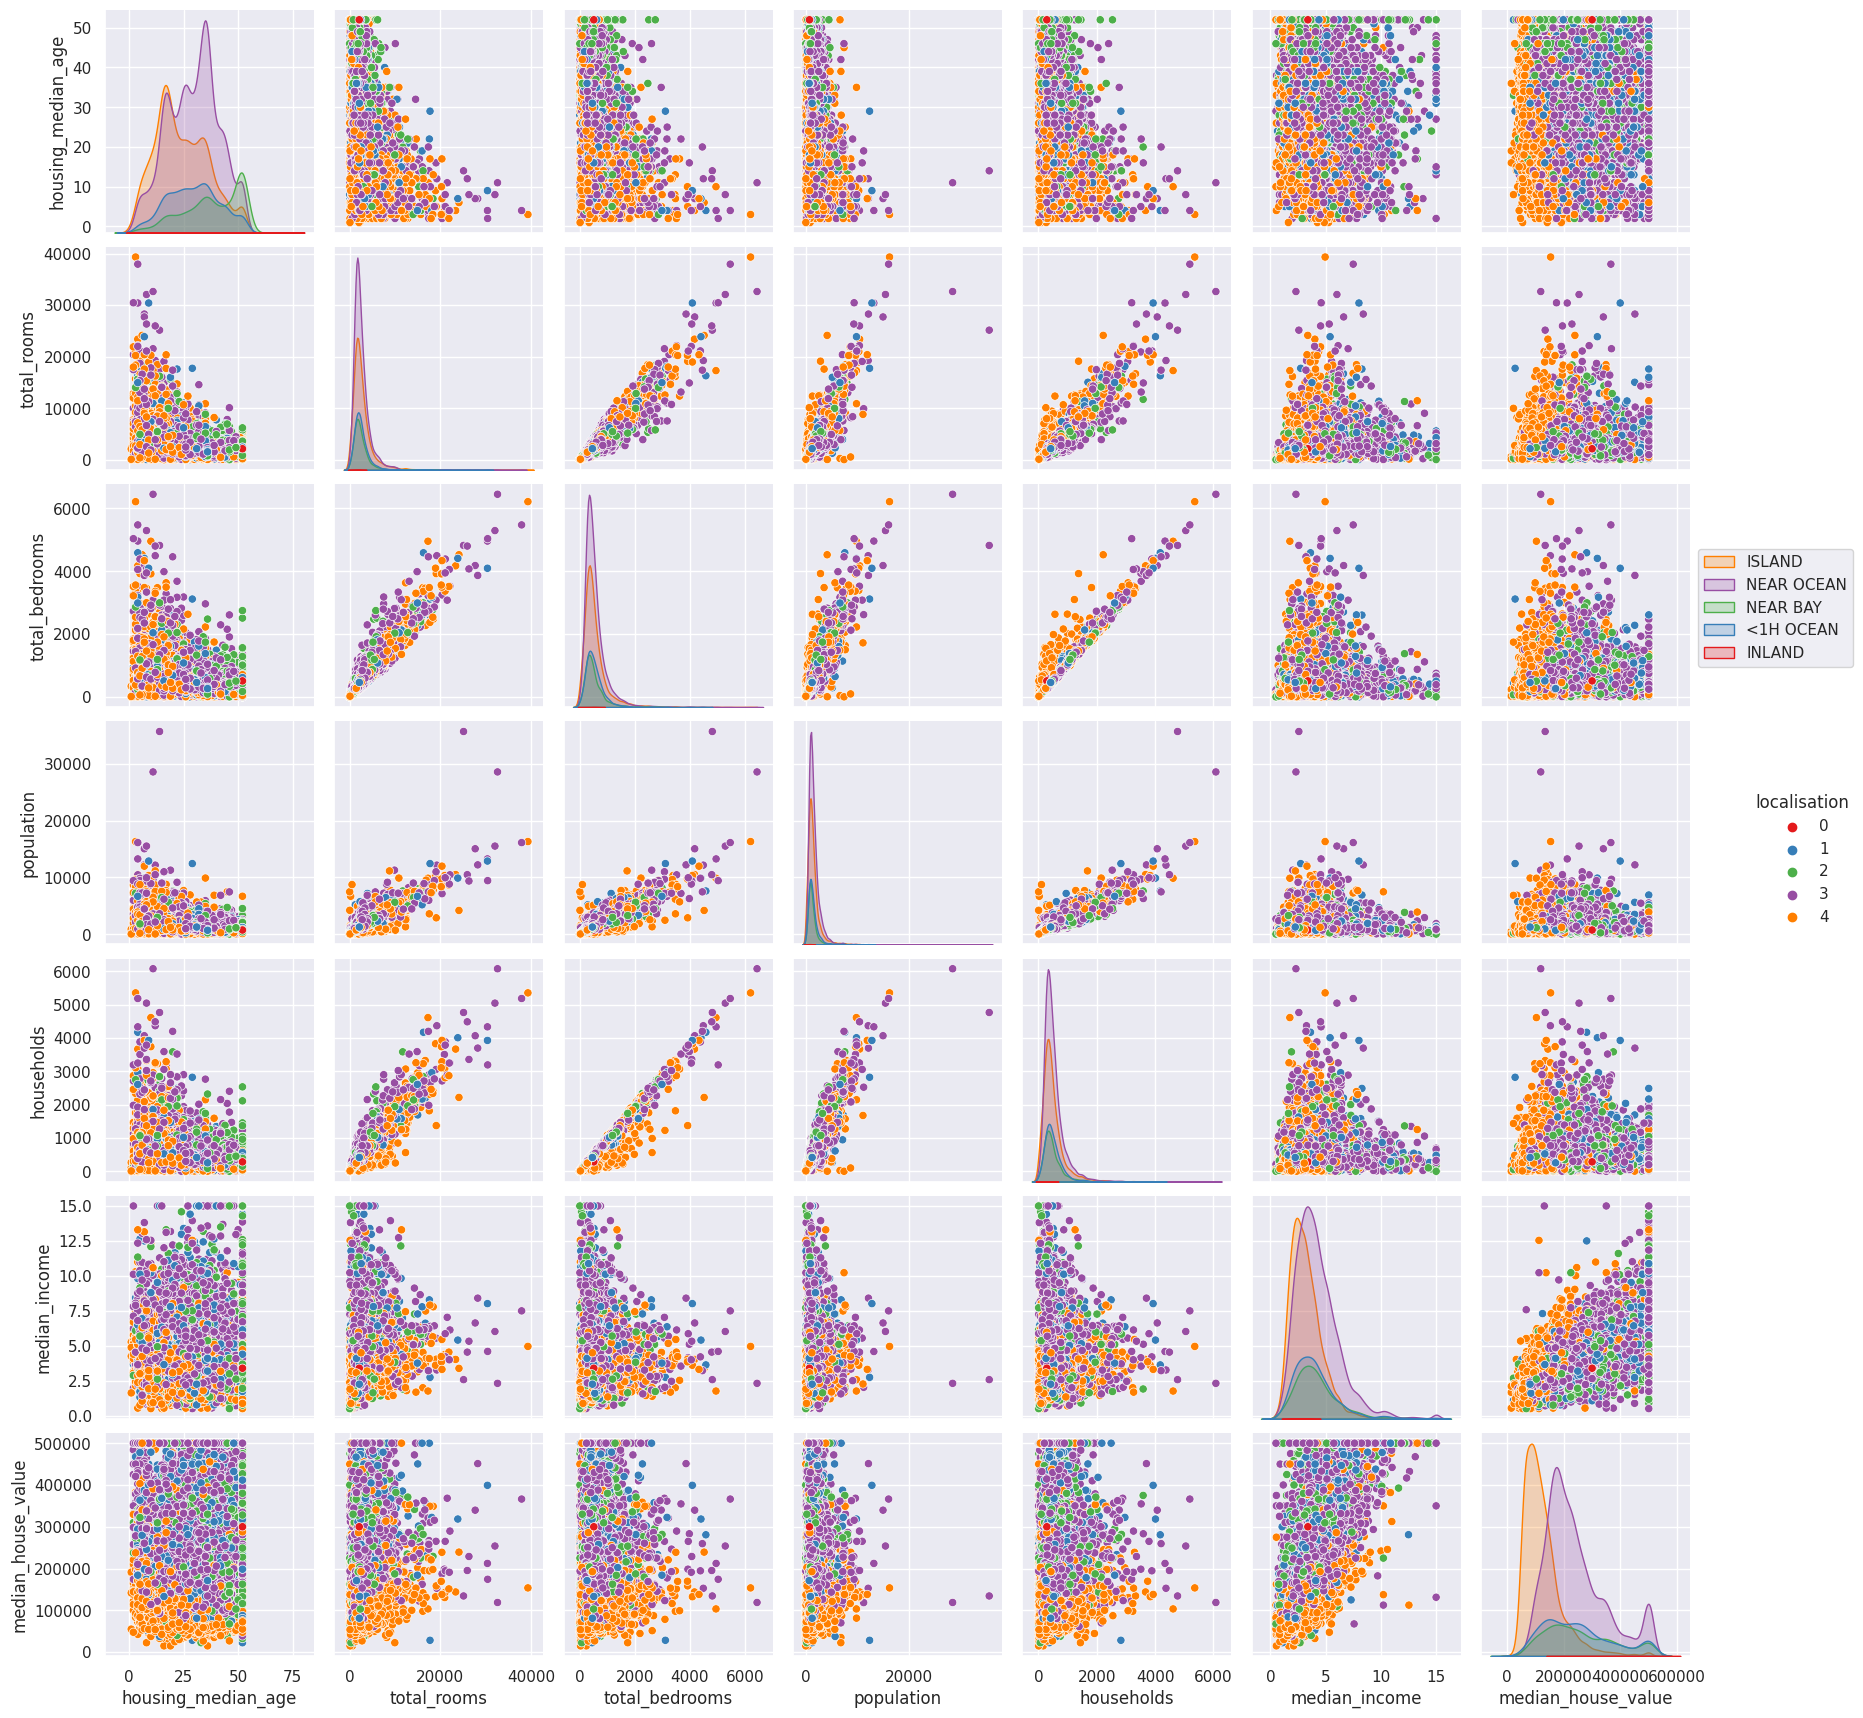

In [37]:
sns.pairplot(feature_localisation, hue="localisation", palette="Set1")

plt.legend(labels=['ISLAND','NEAR OCEAN','NEAR BAY','<1H OCEAN','INLAND'], loc = 2, bbox_to_anchor = (1,5))
plt.show()

On peut voir une tendance pour 
on peut observer que les points

<AxesSubplot:xlabel='localisation', ylabel='population'>

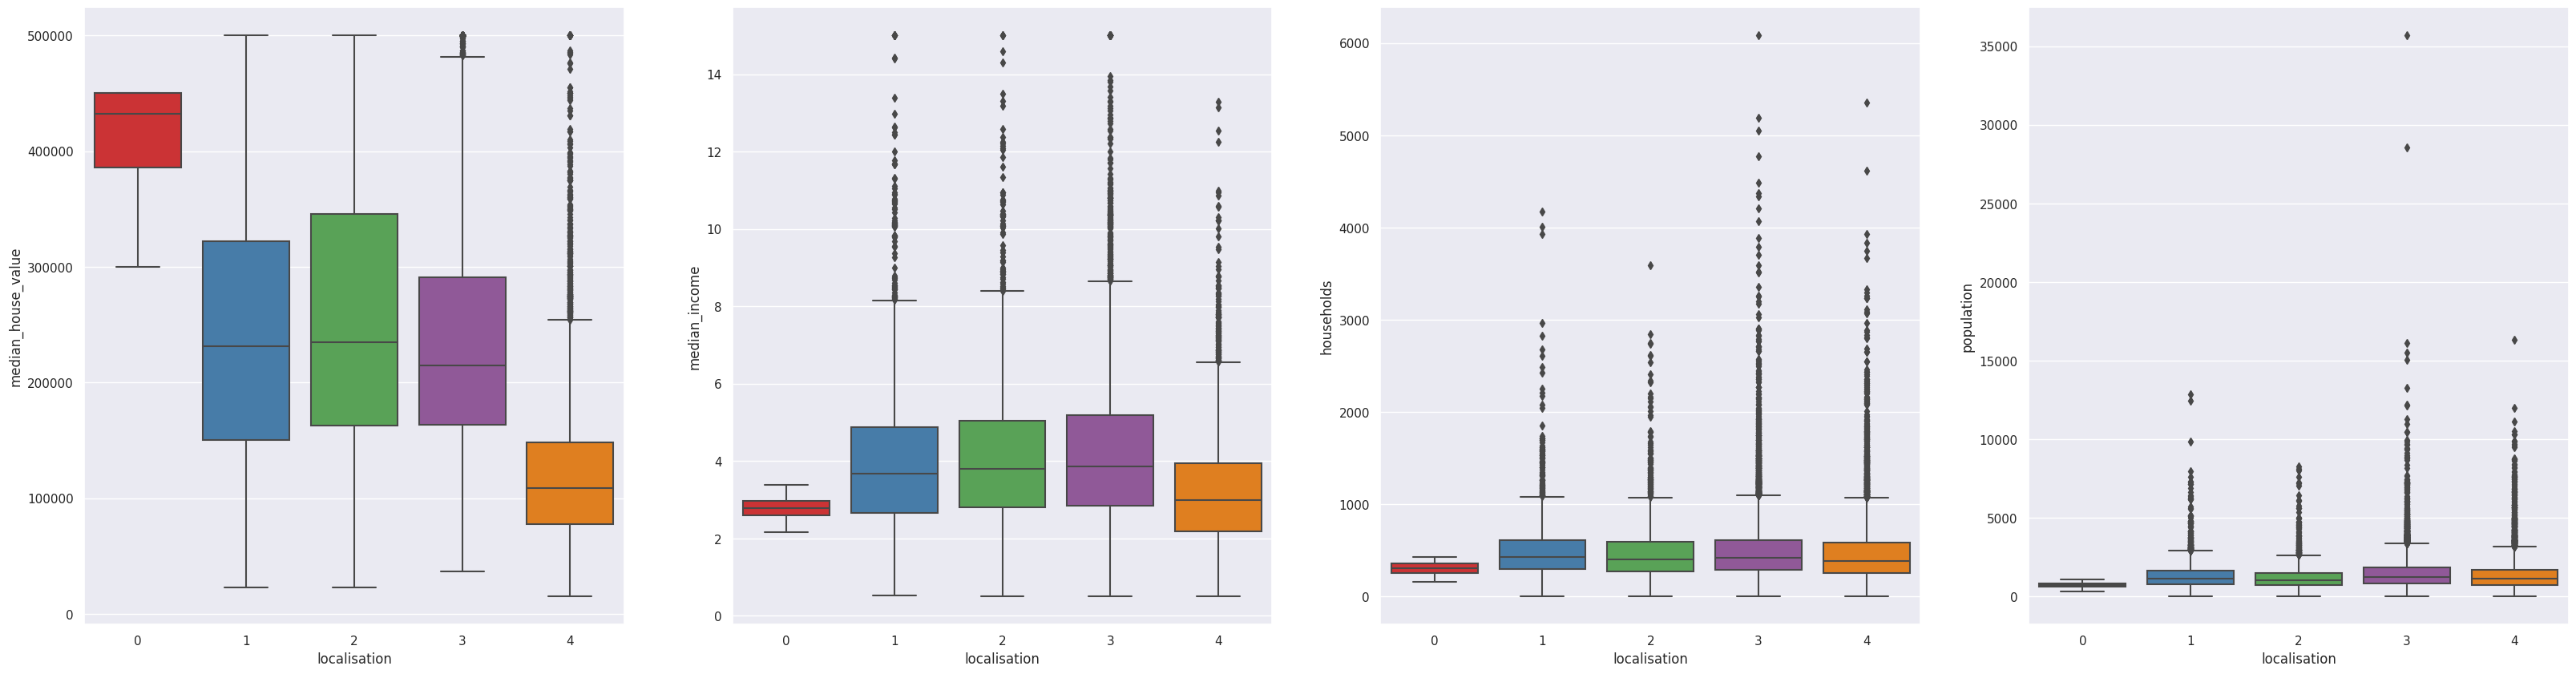

In [38]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,4)
sns.boxplot(y=immo_df["median_house_value"],x=immo_df['localisation'],palette = "Set1", ax=ax[0])
sns.boxplot(y=immo_df["median_income"],x=immo_df['localisation'],palette = "Set1", ax=ax[1])
sns.boxplot(y=immo_df["households"],x=immo_df['localisation'],palette = "Set1", ax=ax[2])
sns.boxplot(y=immo_df["population"],x=immo_df['localisation'],palette = "Set1", ax=ax[3])

<AxesSubplot:xlabel='localisation', ylabel='housing_median_age'>

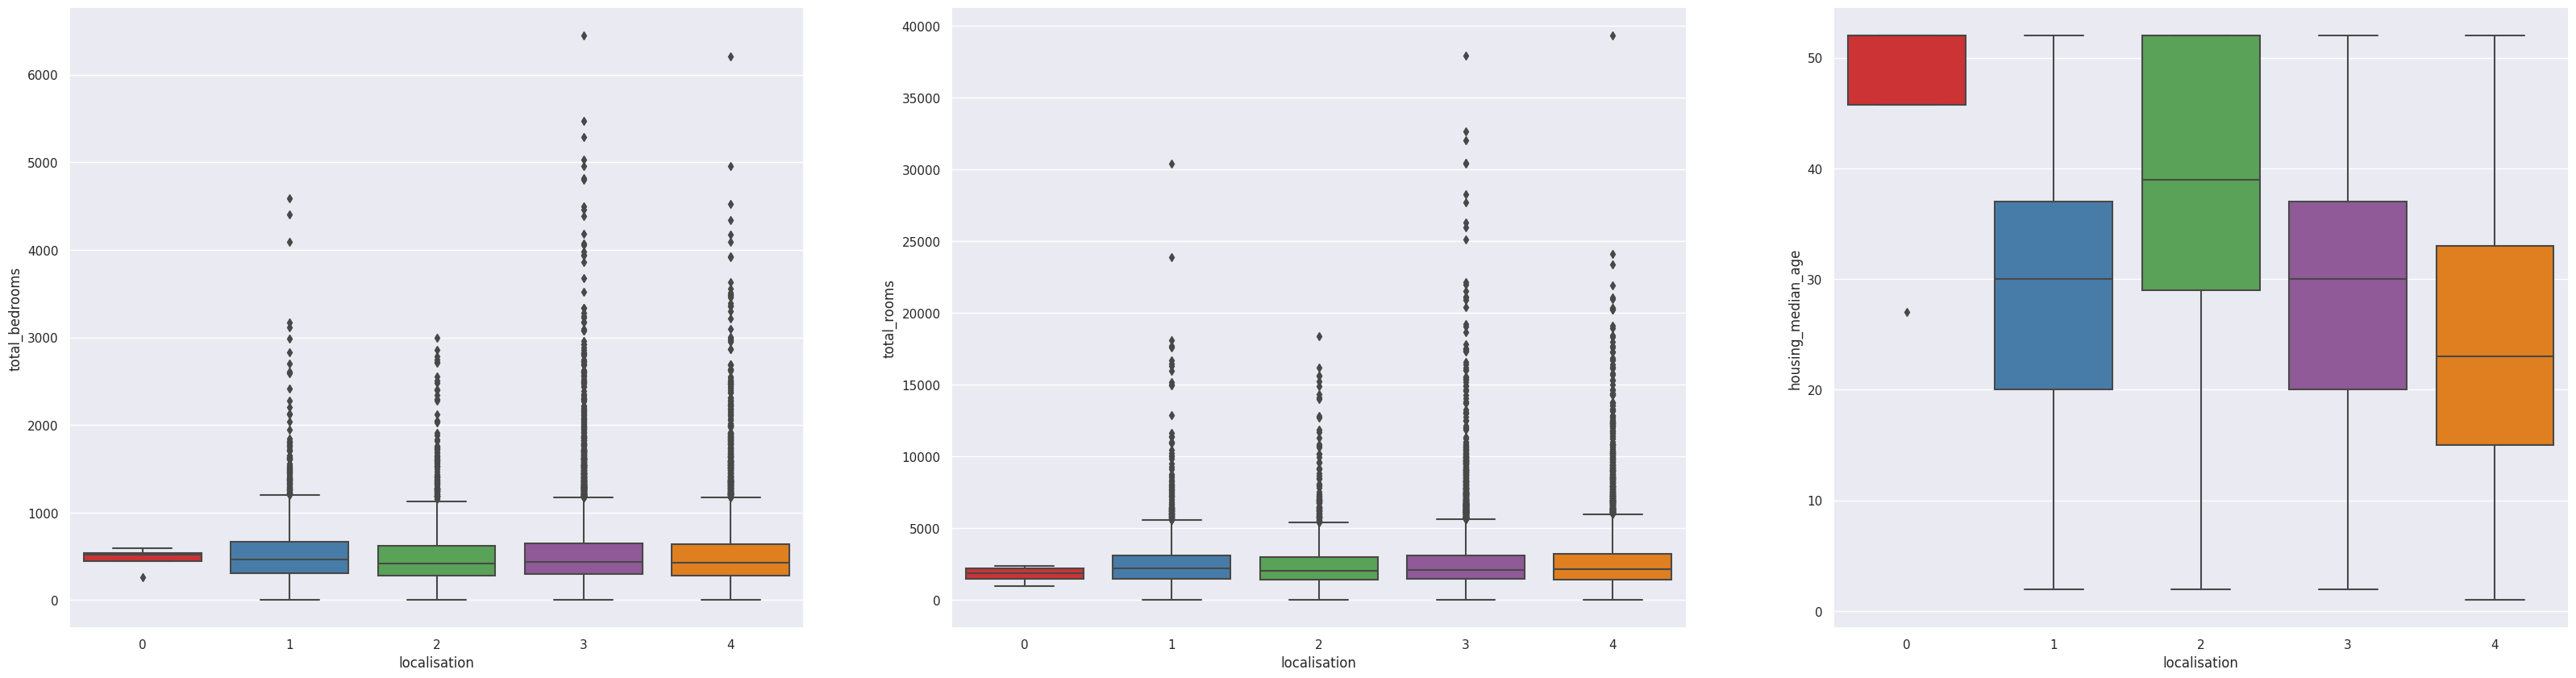

In [39]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,3)
sns.boxplot(y=immo_df["total_bedrooms"],x=immo_df['localisation'],palette = "Set1", ax=ax[0])
sns.boxplot(y=immo_df["total_rooms"],x=immo_df['localisation'],palette = "Set1", ax=ax[1])
sns.boxplot(y=immo_df["housing_median_age"],x=immo_df['localisation'],palette = "Set1", ax=ax[2])


## Export des données

Pour tester le model, je fais la meme modification sur le df ou les NA sont renplacer par les 0

In [40]:
immo_sans_NA['localisation'] = immo_sans_NA.ocean_proximity.apply(lambda x: 
                                            4 if x == 'INLAND'
                                            else 3 if x== '<1H OCEAN'
                                            else 2 if x == 'NEAR BAY'
                                            else 1 if x == 'NEAR OCEAN'
                                            else 0 )

In [41]:
immo_sans_NA.to_csv('immo_iteration2.csv',index=False, encoding='utf-8')

 # troisieme itteration

## Retransformation de la colonne ocean_proximity

In [42]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False).fit(immo_sans_NA[["ocean_proximity"]])
encoded = enc.transform(immo_sans_NA[["ocean_proximity"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())

In [43]:
encoded_df

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16507                         0.0  
16508                         0.0  
16509                         0.0  
16510                         0.0  
16511                         1.0  

[16512 rows x 5 columns]

In [44]:
immo_df2 = immo_sans_NA.join(encoded_df)
immo_df2

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  localisation  \
0                 72000.0          INLAND             4   
1                274100.0       <1H OCEAN             3   
2                 58300.0          INLAND             4   
3                200000.0       <1H OCEAN             3   
4                117900.0          INLAND             4   
...                   ...             ...           ...   
16507             93800.0          INLAND             4   
16508            103100.0        NEAR BAY             2   
16509            192600.0          INLAND             4   
16510            153500.0       <1H OCEAN             3   
16511             81100.0      NEAR OCEAN             1   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16507 

In [45]:
immo_df2= immo_df2.drop("localisation", axis=1)

In [46]:
immo_df2= immo_df2.drop("ocean_proximity", axis=1)
immo_df2

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                 72000.0                        0.0                     1.0   
1                274100.0                        1.0                     0.0   
2                 58300.0                        0.0                     1.0   
3                200000.0                        1.0                     0.0   
4                117900.0                        0.0                     1.0   
...                   ...                        ...                     ...   
16507             93800.0                        0.0                     1.0   
16508            103100.0                        0.0                     0.0   
16509            192600.0                        0.0                     1.0   
16510            153500.0                        1.0                     0.0   
16511             81100.0                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16507                         0.0  
16508                         0.0  
16509                         0.0  
16510                         0.0  
16511                         1.0  

[16512 rows x 15 columns]

## Export des données

In [47]:
immo_df2.to_csv('immo_iteration3.csv',index=False, encoding='utf-8')

## application au df avec na pour la suite

In [48]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(sparse=False).fit(immo_df[["ocean_proximity"]])
encoded = enc.transform(immo_df[["ocean_proximity"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out())
encoded_df

ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16507                         0.0  
16508                         0.0  
16509                         0.0  
16510                         0.0  
16511                         1.0  

[16512 rows x 5 columns]

In [49]:
immo_df3 = immo_df.join(encoded_df)
immo_df3

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  localisation  \
0                 72000.0          INLAND             4   
1                274100.0       <1H OCEAN             3   
2                 58300.0          INLAND             4   
3                200000.0       <1H OCEAN             3   
4                117900.0          INLAND             4   
...                   ...             ...           ...   
16507             93800.0          INLAND             4   
16508            103100.0        NEAR BAY             2   
16509            192600.0          INLAND             4   
16510            153500.0       <1H OCEAN             3   
16511             81100.0      NEAR OCEAN             1   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16507 

In [50]:
immo_df3= immo_df3.drop("localisation", axis=1)

In [51]:
immo_df3= immo_df3.drop("ocean_proximity", axis=1)

 # 4 eme iteration

## imputation des valeurs manquantes

Comme dit precedement les données manquante ne represente que 1 % des données. Malgrés le faible nombre de nul, j'ai decidé de tester les differentes methode d'imputation des données par sklearn. En poltant les differentes methode, je choisirai la meilleur imputation

https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9  


#### Mean and Mode Imputation

In [52]:
immo_df3.isnull().sum()

index                           0
longitude                       0
latitude                        0
housing_median_age              0
total_rooms                     0
total_bedrooms                176
population                      0
households                      0
median_income                   0
median_house_value              0
ocean_proximity_<1H OCEAN       0
ocean_proximity_INLAND          0
ocean_proximity_ISLAND          0
ocean_proximity_NEAR BAY        0
ocean_proximity_NEAR OCEAN      0
dtype: int64

In [53]:
import numpy as np
from sklearn.impute import SimpleImputer
df_test = immo_df3.copy()
mean_imputer = SimpleImputer(strategy='mean')
df_test['total_bedrooms'] = mean_imputer.fit_transform(df_test['total_bedrooms'].values.reshape(-1,1))
df_test

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                 72000.0                        0.0                     1.0   
1                274100.0                        1.0                     0.0   
2                 58300.0                        0.0                     1.0   
3                200000.0                        1.0                     0.0   
4                117900.0                        0.0                     1.0   
...                   ...                        ...                     ...   
16507             93800.0                        0.0                     1.0   
16508            103100.0                        0.0                     0.0   
16509            192600.0                        0.0                     1.0   
16510            153500.0                        1.0                     0.0   
16511             81100.0                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16507                         0.0  
16508                         0.0  
16509                         0.0  
16510                         0.0  
16511                         1.0  

[16512 rows x 15 columns]

J'ai decidé d'utiliser total  room pour ploter les resultats car les deux colonnes sont trés corélé

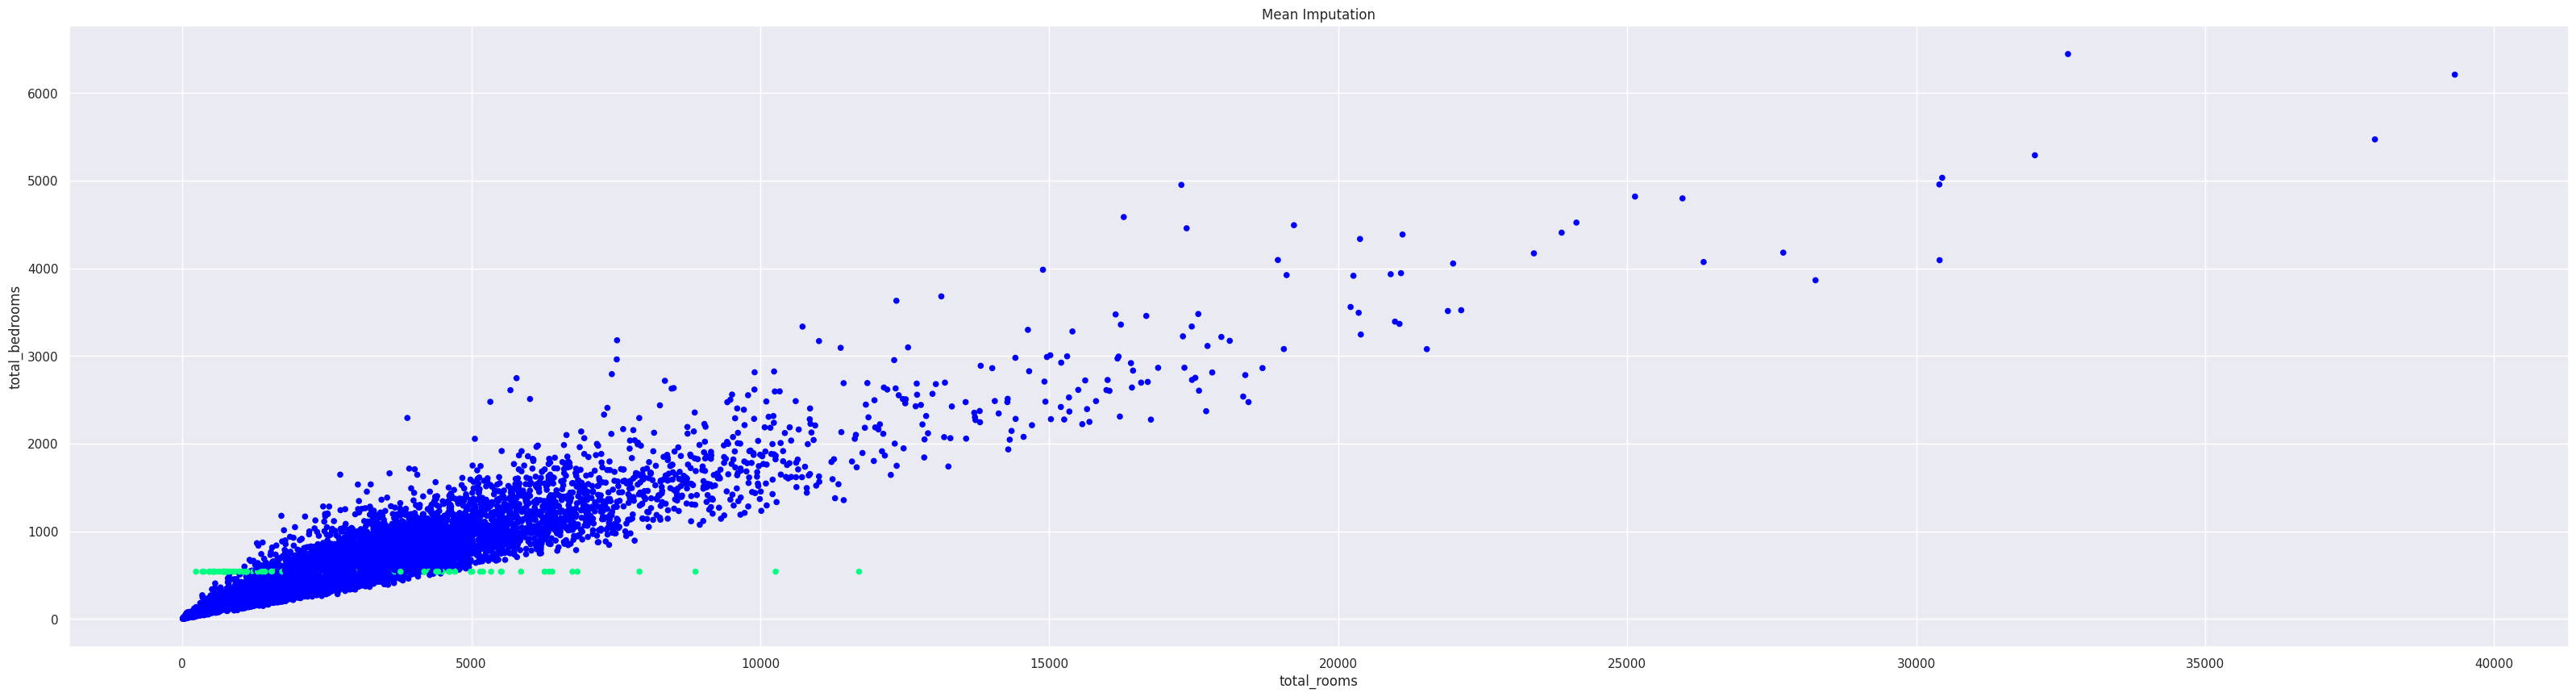

In [54]:
fig = plt.Figure()
null_values = immo_df3['total_bedrooms'].isnull()
fig = df_test.plot(x="total_rooms", y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='Mean Imputation', colorbar=False)

Les valeurs imputé sont représenter en bleu clair, on voit qu'il ne suivent pas la tendance general des points lorsque l'on plot total bedrooms et total rooms

In [55]:
df_test2 = immo_df3.copy()
mean_imputer = SimpleImputer(strategy='most_frequent')
df_test2['total_bedrooms'] = mean_imputer.fit_transform(df_test2['total_bedrooms'].values.reshape(-1,1))
df_test2

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072    -119.84     36.77                 6.0       1853.0   
1      10600    -117.80     33.68                 8.0       2032.0   
2       2494    -120.19     36.60                25.0        875.0   
3       4284    -118.32     34.10                31.0        622.0   
4      16541    -121.23     37.79                21.0       1922.0   
...      ...        ...       ...                 ...          ...   
16507   1099    -121.90     39.59                20.0       1465.0   
16508  18898    -122.25     38.11                49.0       2365.0   
16509  11798    -121.22     38.92                19.0       2531.0   
16510   6637    -118.14     34.16                39.0       2776.0   
16511   2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value  ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                 72000.0                        0.0                     1.0   
1                274100.0                        1.0                     0.0   
2                 58300.0                        0.0                     1.0   
3                200000.0                        1.0                     0.0   
4                117900.0                        0.0                     1.0   
...                   ...                        ...                     ...   
16507             93800.0                        0.0                     1.0   
16508            103100.0                        0.0                     0.0   
16509            192600.0                        0.0                     1.0   
16510            153500.0                        1.0                     0.0   
16511             81100.0                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16507                         0.0  
16508                         0.0  
16509                         0.0  
16510                         0.0  
16511                         1.0  

[16512 rows x 15 columns]

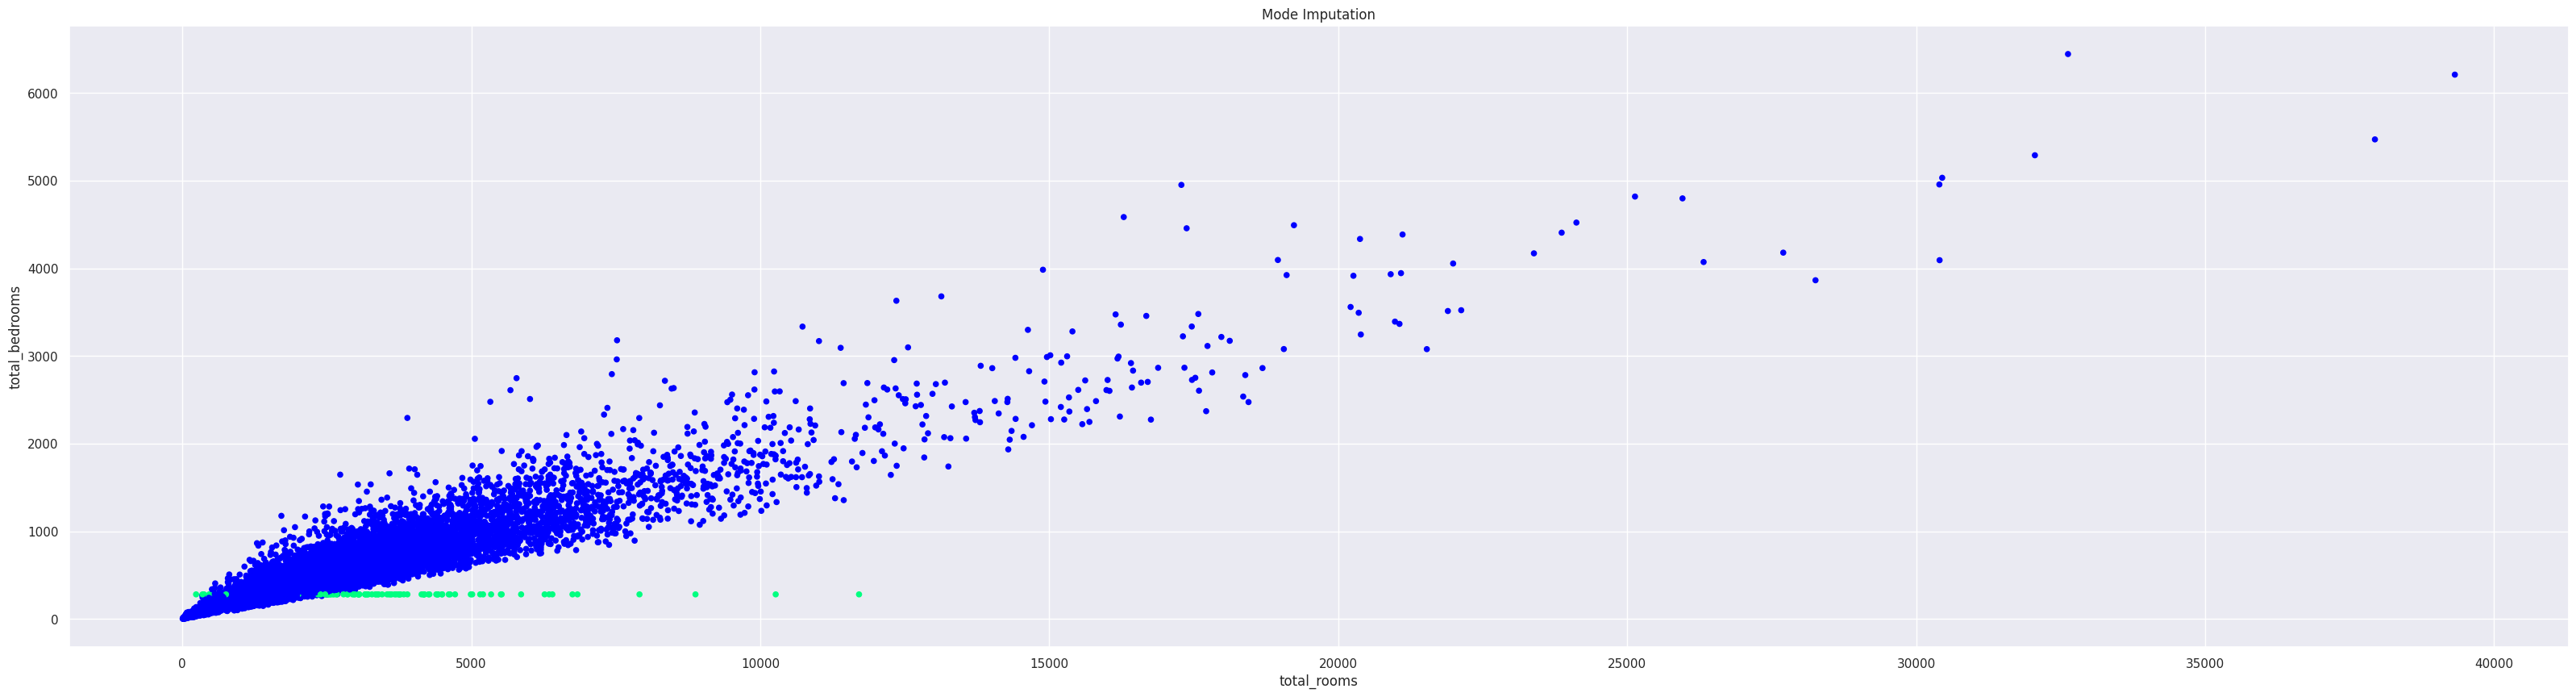

In [56]:
fig = plt.Figure()
null_values = immo_df3['total_bedrooms'].isnull()
fig = df_test2.plot(x="total_rooms", y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='Mode Imputation', colorbar=False)

####  K-Nearest Neighbour (KNN) Imputation

In [57]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = immo_df3.filter(['index','longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','median_house_value'], axis=1).copy()

# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

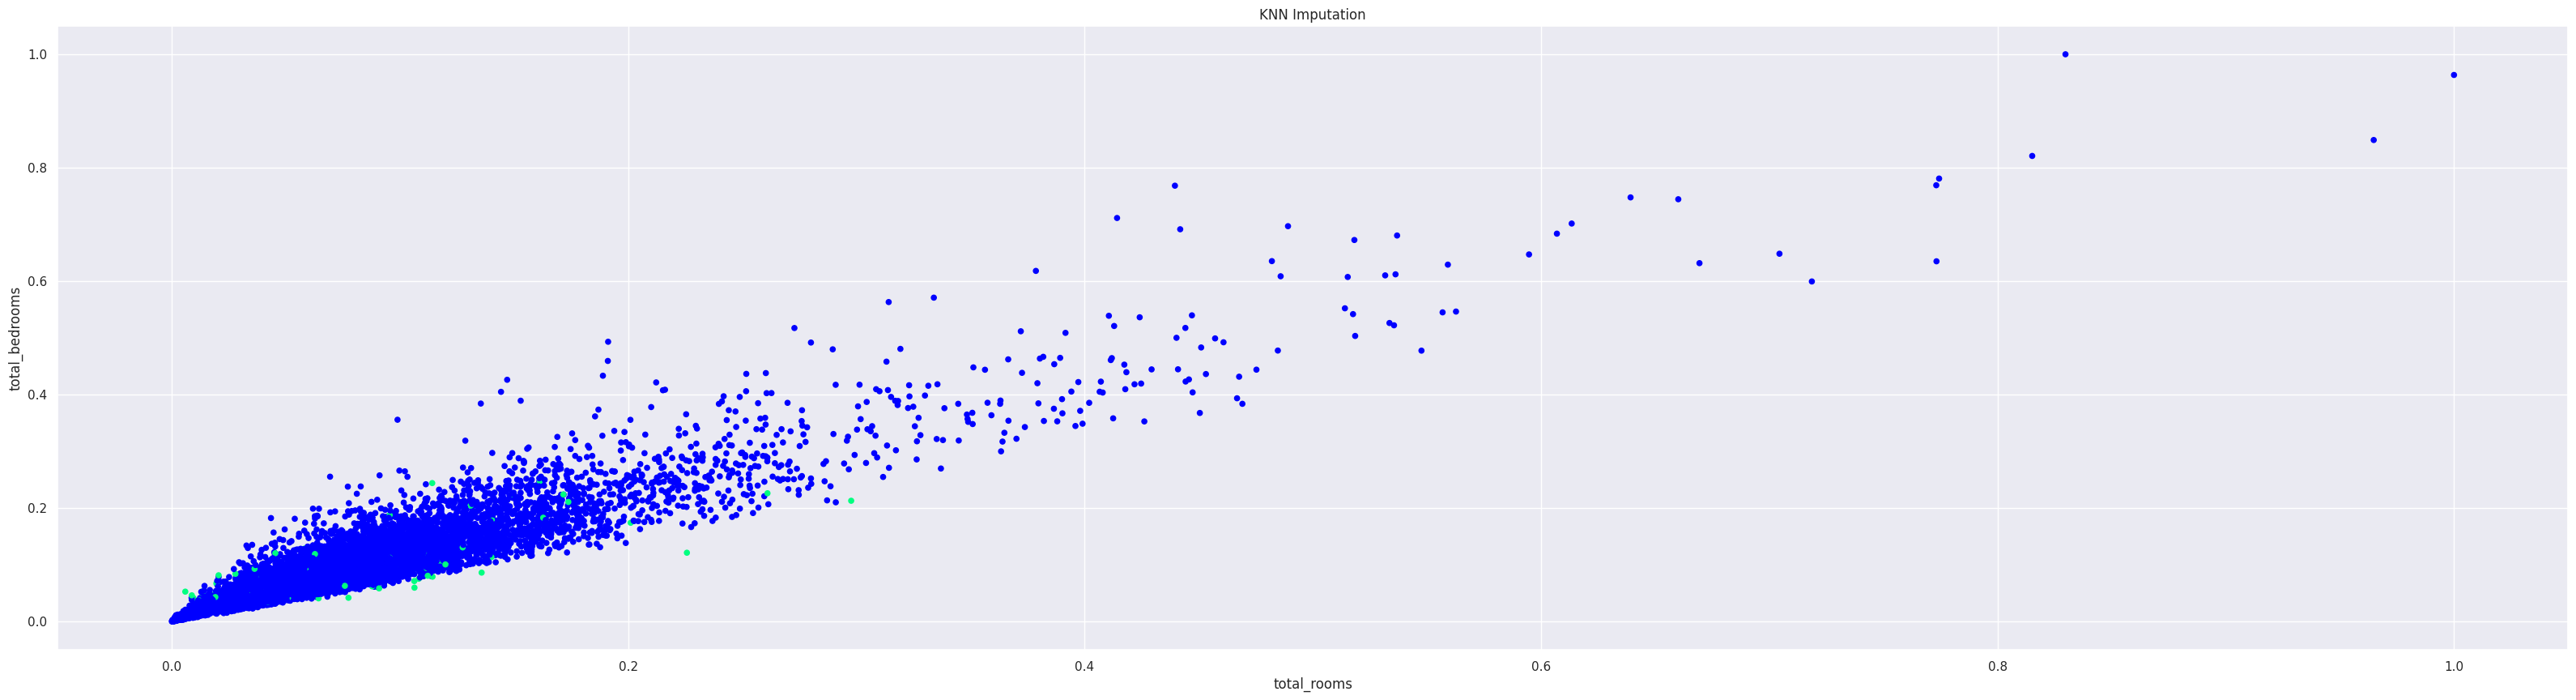

In [58]:
fig = plt.Figure()
null_values = immo_df['total_bedrooms'].isnull() 
fig = df_knn_imputed.plot(x="total_rooms", y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='KNN Imputation', colorbar=False)

In [59]:
df_knn_imputed

index  longitude  latitude  housing_median_age  total_rooms  \
0      0.100392   0.449203  0.449522            0.098039     0.046981   
1      0.513591   0.652390  0.121148            0.137255     0.051534   
2      0.120839   0.414343  0.431456            0.470588     0.022104   
3      0.207568   0.600598  0.165781            0.588235     0.015669   
4      0.801444   0.310757  0.557917            0.392157     0.048736   
...         ...        ...       ...                 ...          ...   
16507  0.053249   0.244024  0.749203            0.372549     0.037111   
16508  0.915645   0.209163  0.591923            0.941176     0.060004   
16509  0.571636   0.311753  0.678002            0.352941     0.064226   
16510  0.321576   0.618526  0.172157            0.745098     0.070458   
16511  0.124764   0.021912  0.877790            0.588235     0.054586   

       total_bedrooms  population  households  median_income  \
0            0.073103    0.039071    0.068257       0.067709   
1            0.053857    0.024076    0.055592       0.442297   
2            0.032904    0.026010    0.034868       0.072668   
3            0.035232    0.016648    0.037007       0.070930   
4            0.057582    0.031587    0.060855       0.247003   
...               ...         ...         ...            ...   
16507        0.042837    0.020797    0.040789       0.176729   
16508        0.077914    0.031615    0.075000       0.145750   
16509        0.071240    0.033717    0.070230       0.275576   
16510        0.130064    0.071274    0.126809       0.143108   
16511        0.071395    0.035203    0.068750       0.120543   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  median_house_value  
0                             0.0            0.117527  
1                             0.0            0.534227  
2                             0.0            0.089280  
3                             0.0            0.381444  
4                             0.0            0.212166  
...                           ...                 ...  
16507                         0.0            0.162476  
16508                         0.0            0.181651  
16509                         0.0            0.366186  
16510                         0.0            0.285568  
16511                         1.0            0.136290  

[16512 rows x 15 columns]

#### Multivariate Imputation by Chained Equation — MICE

In [60]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = immo_df3.filter(['index','longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','median_house_value'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)


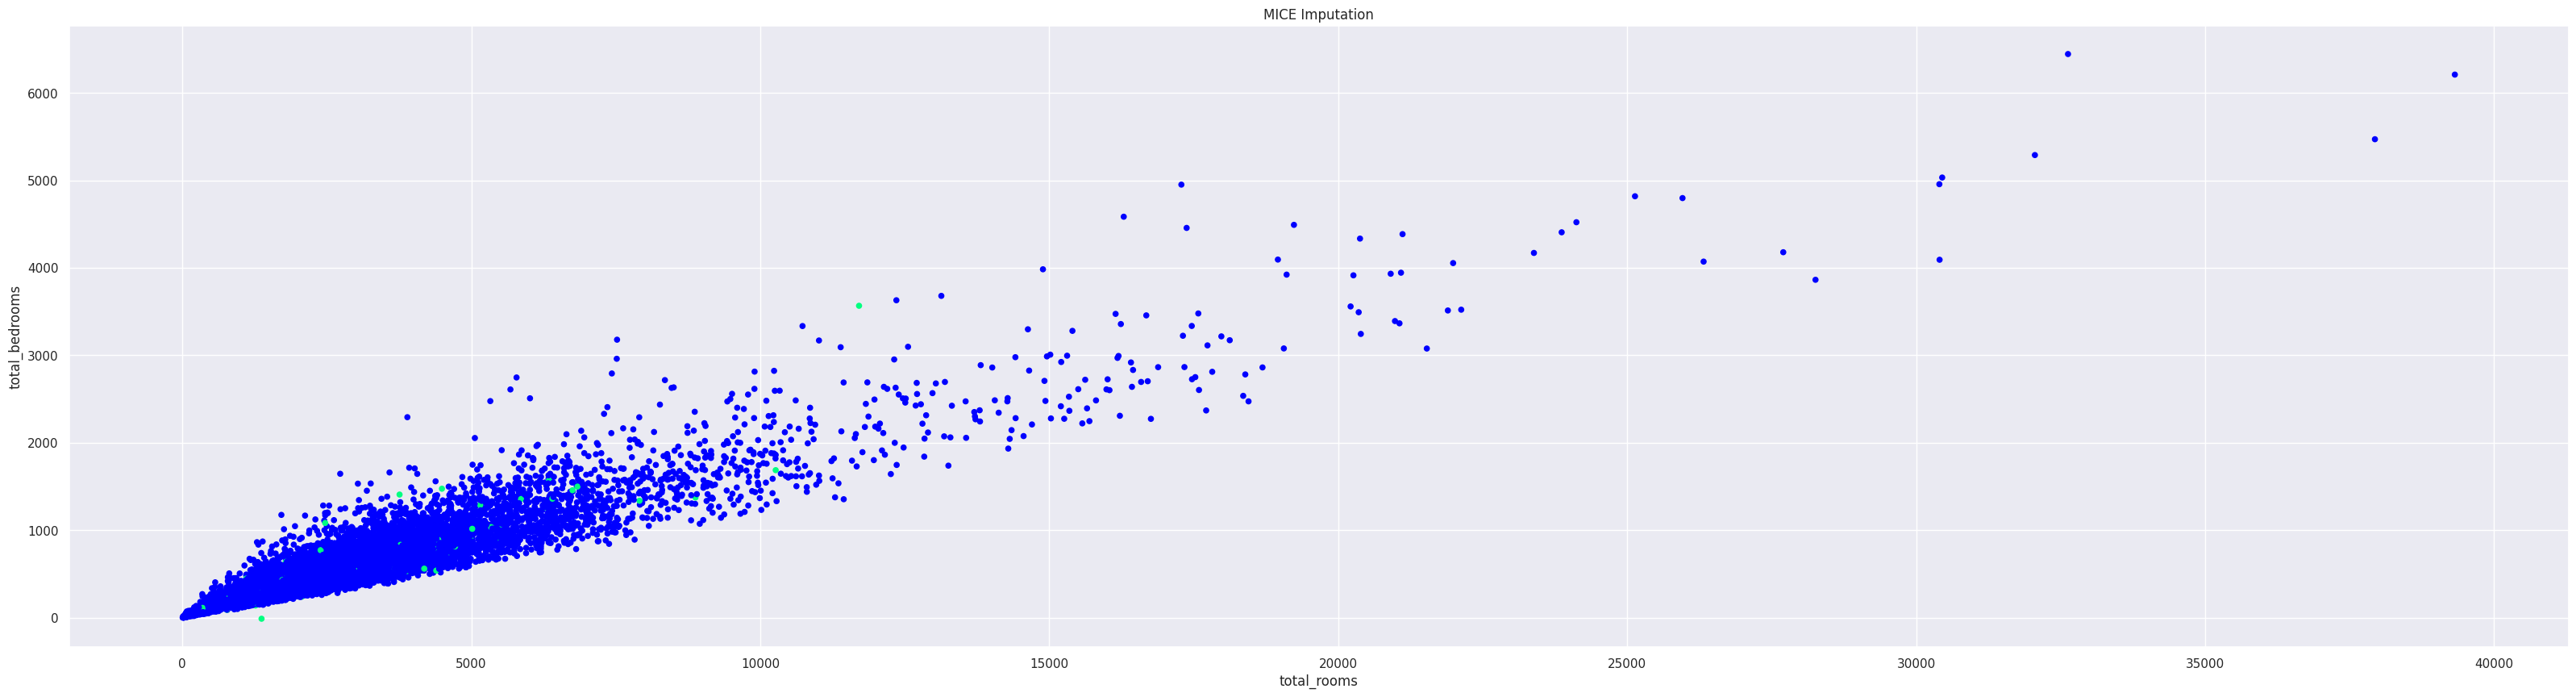

In [61]:
fig = plt.Figure()
null_values = immo_df['total_bedrooms'].isnull()
fig = df_mice_imputed.plot(x='total_rooms', y='total_bedrooms', kind='scatter', c=null_values, cmap='winter', title='MICE Imputation', colorbar=False)

In [62]:
df_mice_imputed

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072.0    -119.84     36.77                 6.0       1853.0   
1      10600.0    -117.80     33.68                 8.0       2032.0   
2       2494.0    -120.19     36.60                25.0        875.0   
3       4284.0    -118.32     34.10                31.0        622.0   
4      16541.0    -121.23     37.79                21.0       1922.0   
...        ...        ...       ...                 ...          ...   
16507   1099.0    -121.90     39.59                20.0       1465.0   
16508  18898.0    -122.25     38.11                49.0       2365.0   
16509  11798.0    -121.22     38.92                19.0       2531.0   
16510   6637.0    -118.14     34.16                39.0       2776.0   
16511   2575.0    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  median_house_value  
0                             0.0             72000.0  
1                             0.0            274100.0  
2                             0.0             58300.0  
3                             0.0            200000.0  
4                             0.0            117900.0  
...                           ...                 ...  
16507                         0.0             93800.0  
16508                         0.0            103100.0  
16509                         0.0            192600.0  
16510                         0.0            153500.0  
16511                         1.0             81100.0  

[16512 rows x 15 columns]

In [63]:
immo_df4= df_mice_imputed.copy()

## Export des données

In [64]:
immo_df4.to_csv('immo_iteration4.csv',index=False, encoding='utf-8')

 # 5 eme iteration

  utilisation des imputation  K-Nearest Neighbour (KNN) les données sont toutes scaler avec le MinMaxScaler mais longitude ne peux pas etre presente car minmax pas les negative

In [65]:
df_knn_imputed.to_csv('immo_iteration5.csv',index=False, encoding='utf-8')

 # 6 eme iteration

## Outlier

In [66]:
q1_median_income=np.quantile(immo_df4['median_income'],0.25)
q3_median_income=np.quantile(immo_df4['median_income'],0.75)
out_median_income= (q3_median_income +1.5*(q3_median_income-q1_median_income)) 
outlier_median_income=immo_df4.loc[immo_df2['median_income']> out_median_income ]
outlier_median_income = outlier_median_income.sort_values(by='median_income', ascending = False)
outlier_median_income

index  longitude  latitude  housing_median_age  total_rooms  \
13780  15693.0    -122.44     37.79                52.0       1447.0   
6599    8852.0    -118.42     34.08                48.0       2413.0   
2252    4352.0    -118.37     34.10                37.0        407.0   
8465    1566.0    -121.96     37.74                 2.0        200.0   
13846  17118.0    -122.14     37.50                46.0         30.0   
...        ...        ...       ...                 ...          ...   
16125   8635.0    -118.40     33.88                35.0       1060.0   
9523   20248.0    -119.23     34.25                28.0         26.0   
10852   9405.0    -122.53     37.87                20.0       1814.0   
10769   6719.0    -118.13     34.13                52.0       2826.0   
3762   20388.0    -118.90     34.20                16.0       6510.0   

       total_bedrooms  population  households  median_income  \
13780           186.0       483.0       181.0        15.0001   
6599            261.0       770.0       248.0        15.0001   
2252             67.0       100.0        47.0        15.0001   
8465             20.0        25.0         9.0        15.0001   
13846             4.0        13.0         5.0        15.0001   
...               ...         ...         ...            ...   
16125           191.0       444.0       196.0         8.0015   
9523              3.0        29.0         9.0         8.0000   
10852           282.0       658.0       253.0         7.9977   
10769           381.0       924.0       365.0         7.9976   
3762            817.0      2304.0       778.0         7.9943   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
13780                        0.0                     0.0   
6599                         1.0                     0.0   
2252                         1.0                     0.0   
8465                         1.0                     0.0   
13846                        0.0                     0.0   
...                          ...                     ...   
16125                        1.0                     0.0   
9523                         0.0                     0.0   
10852                        0.0                     0.0   
10769                        1.0                     0.0   
3762                         1.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
13780                     0.0                       1.0   
6599                      0.0                       0.0   
2252                      0.0                       0.0   
8465                      0.0                       0.0   
13846                     0.0                       1.0   
...                       ...                       ...   
16125                     0.0                       0.0   
9523                      0.0                       0.0   
10852                     0.0                       1.0   
10769                     0.0                       0.0   
3762                      0.0                       0.0   

       ocean_proximity_NEAR OCEAN  median_house_value  
13780                         0.0            500001.0  
6599                          0.0            500001.0  
2252                          0.0            500001.0  
8465                          0.0            350000.0  
13846                         0.0            500001.0  
...                           ...                 ...  
16125                         0.0            500001.0  
9523                          1.0            275000.0  
10852                         0.0            400000.0  
10769                         0.0            500001.0  
3762                          0.0            452100.0  

[555 rows x 15 columns]

In [67]:
test=outlier_median_income.loc[outlier_median_income['median_income']>14.000]
test.shape

(43, 15)

In [68]:
immo_df5=immo_df4.loc[immo_df2['median_income']<14.000]
immo_df5

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072.0    -119.84     36.77                 6.0       1853.0   
1      10600.0    -117.80     33.68                 8.0       2032.0   
2       2494.0    -120.19     36.60                25.0        875.0   
3       4284.0    -118.32     34.10                31.0        622.0   
4      16541.0    -121.23     37.79                21.0       1922.0   
...        ...        ...       ...                 ...          ...   
16507   1099.0    -121.90     39.59                20.0       1465.0   
16508  18898.0    -122.25     38.11                49.0       2365.0   
16509  11798.0    -121.22     38.92                19.0       2531.0   
16510   6637.0    -118.14     34.16                39.0       2776.0   
16511   2575.0    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  median_house_value  
0                             0.0             72000.0  
1                             0.0            274100.0  
2                             0.0             58300.0  
3                             0.0            200000.0  
4                             0.0            117900.0  
...                           ...                 ...  
16507                         0.0             93800.0  
16508                         0.0            103100.0  
16509                         0.0            192600.0  
16510                         0.0            153500.0  
16511                         1.0             81100.0  

[16469 rows x 15 columns]

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

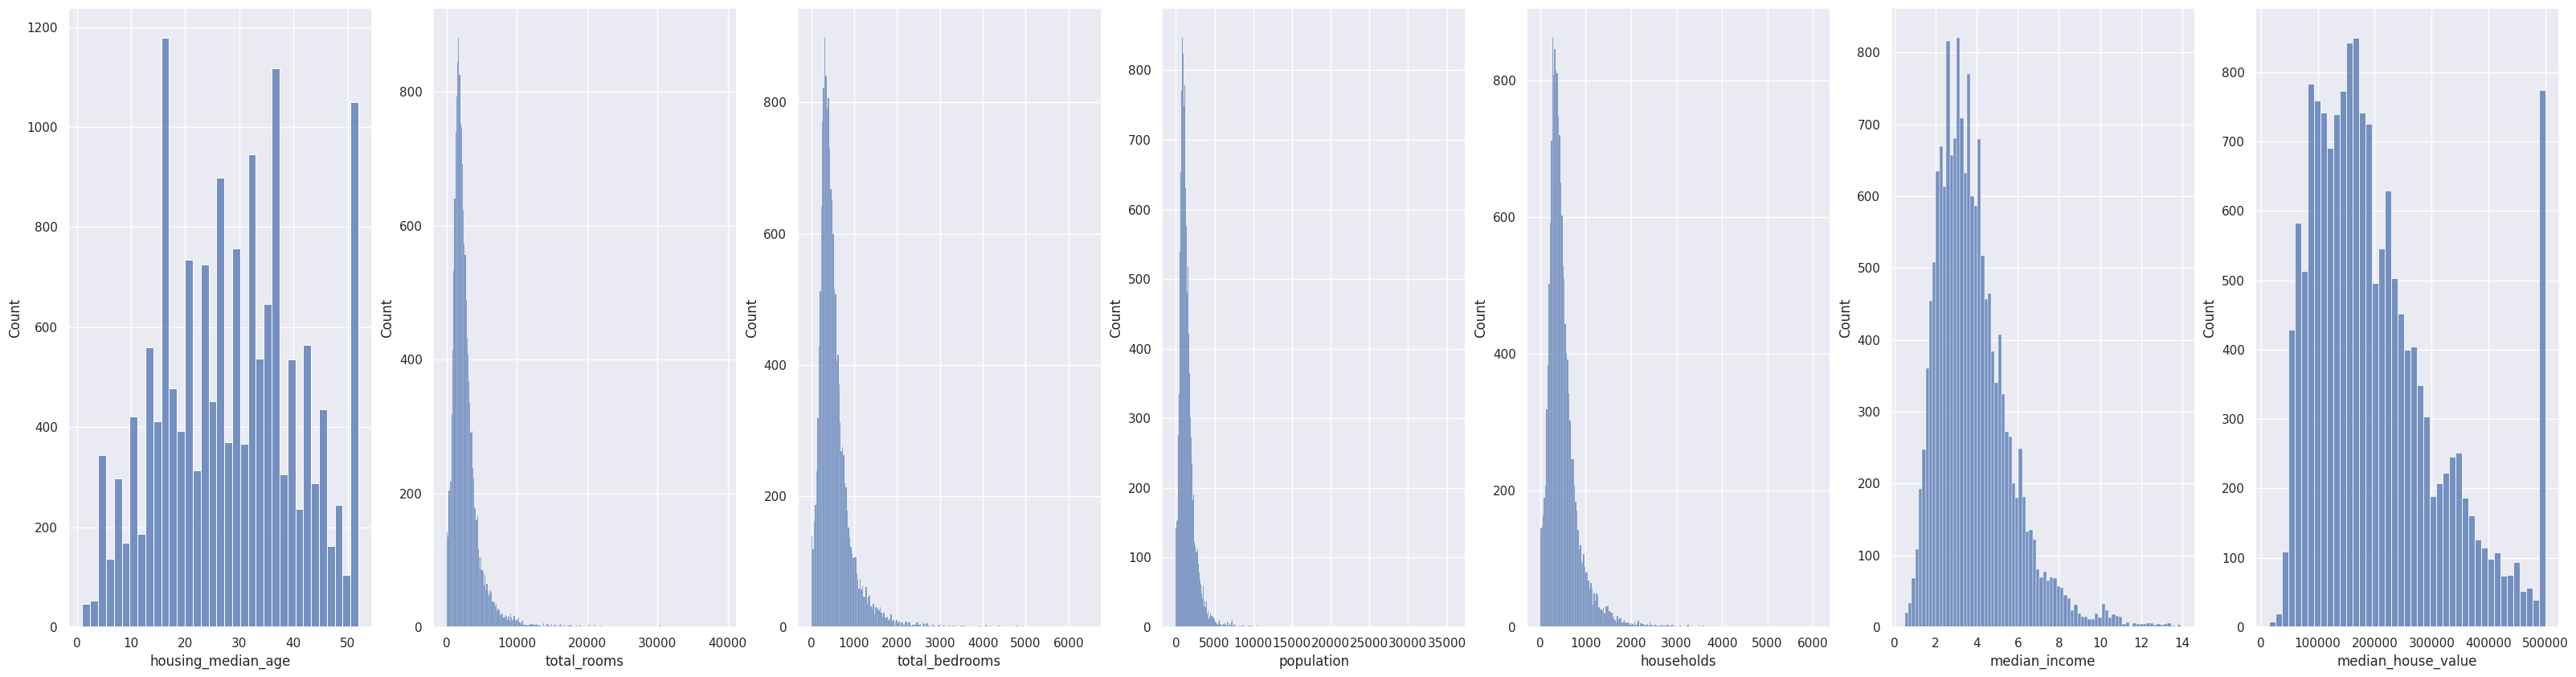

In [69]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,7)
sns.histplot(x=immo_df5["housing_median_age"], ax=ax[0])
sns.histplot(x=immo_df5["total_rooms"], ax=ax[1])
sns.histplot(x=immo_df5["total_bedrooms"], ax=ax[2])
sns.histplot(x=immo_df5["population"], ax=ax[3])
sns.histplot(x=immo_df5["households"], ax=ax[4])
sns.histplot(x=immo_df5["median_income"], ax=ax[5])
sns.histplot(x=immo_df5["median_house_value"], ax=ax[6])

In [70]:
q1_population=np.quantile(immo_df5['population'],0.25)
q3_population=np.quantile(immo_df5['population'],0.75)
out_population= (q3_population+1.5*(q3_population-q1_population)) 
outlier_population=immo_df5.loc[immo_df5['population']> out_population ]
outlier_population = outlier_population.sort_values(by='population', ascending = False)
outlier_population

index  longitude  latitude  housing_median_age  total_rooms  \
7471   15360.0    -117.42     33.35                14.0      25135.0   
14503   9880.0    -121.79     36.64                11.0      32627.0   
4185   13139.0    -121.44     38.43                 3.0      39320.0   
13922  10309.0    -117.74     33.89                 4.0      37937.0   
13152   6057.0    -117.78     34.03                 8.0      32054.0   
...        ...        ...       ...                 ...          ...   
127    11403.0    -117.92     33.73                14.0       5147.0   
83     10936.0    -117.90     33.74                24.0       1435.0   
1606   20267.0    -119.19     34.20                18.0       3620.0   
1089   17004.0    -122.28     37.54                24.0       5114.0   
965    13010.0    -121.25     38.72                15.0       6838.0   

       total_bedrooms  population  households  median_income  \
7471      4819.000000     35682.0      4769.0         2.5729   
14503     6445.000000     28566.0      6082.0         2.3087   
4185      6210.000000     16305.0      5358.0         4.9516   
13922     5471.000000     16122.0      5189.0         7.4947   
13152     5290.000000     15507.0      5050.0         6.0191   
...               ...         ...         ...            ...   
127       1182.000000      3171.0      1126.0         3.9929   
83         494.000000      3171.0       504.0         3.0833   
1606       787.568221      3171.0       779.0         3.3409   
1089      1357.000000      3169.0      1268.0         3.9699   
965        941.000000      3166.0       926.0         5.2177   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
7471                         1.0                     0.0   
14503                        1.0                     0.0   
4185                         0.0                     1.0   
13922                        1.0                     0.0   
13152                        1.0                     0.0   
...                          ...                     ...   
127                          1.0                     0.0   
83                           1.0                     0.0   
1606                         0.0                     0.0   
1089                         0.0                     0.0   
965                          0.0                     1.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
7471                      0.0                       0.0   
14503                     0.0                       0.0   
4185                      0.0                       0.0   
13922                     0.0                       0.0   
13152                     0.0                       0.0   
...                       ...                       ...   
127                       0.0                       0.0   
83                        0.0                       0.0   
1606                      0.0                       0.0   
1089                      0.0                       0.0   
965                       0.0                       0.0   

       ocean_proximity_NEAR OCEAN  median_house_value  
7471                          0.0            134400.0  
14503                         0.0            118800.0  
4185                          0.0            153700.0  
13922                         0.0            366300.0  
13152                         0.0            253900.0  
...                           ...                 ...  
127                           0.0            225800.0  
83                            0.0            151700.0  
1606                          1.0            220500.0  
1089                          1.0            293200.0  
965                           0.0            162700.0  

[950 rows x 15 columns]

In [71]:
immo_df5=immo_df5.loc[immo_df5['population']<28565.0]
immo_df5

index  longitude  latitude  housing_median_age  total_rooms  \
0       2072.0    -119.84     36.77                 6.0       1853.0   
1      10600.0    -117.80     33.68                 8.0       2032.0   
2       2494.0    -120.19     36.60                25.0        875.0   
3       4284.0    -118.32     34.10                31.0        622.0   
4      16541.0    -121.23     37.79                21.0       1922.0   
...        ...        ...       ...                 ...          ...   
16507   1099.0    -121.90     39.59                20.0       1465.0   
16508  18898.0    -122.25     38.11                49.0       2365.0   
16509  11798.0    -121.22     38.92                19.0       2531.0   
16510   6637.0    -118.14     34.16                39.0       2776.0   
16511   2575.0    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  median_house_value  
0                             0.0             72000.0  
1                             0.0            274100.0  
2                             0.0             58300.0  
3                             0.0            200000.0  
4                             0.0            117900.0  
...                           ...                 ...  
16507                         0.0             93800.0  
16508                         0.0            103100.0  
16509                         0.0            192600.0  
16510                         0.0            153500.0  
16511                         1.0             81100.0  

[16467 rows x 15 columns]

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

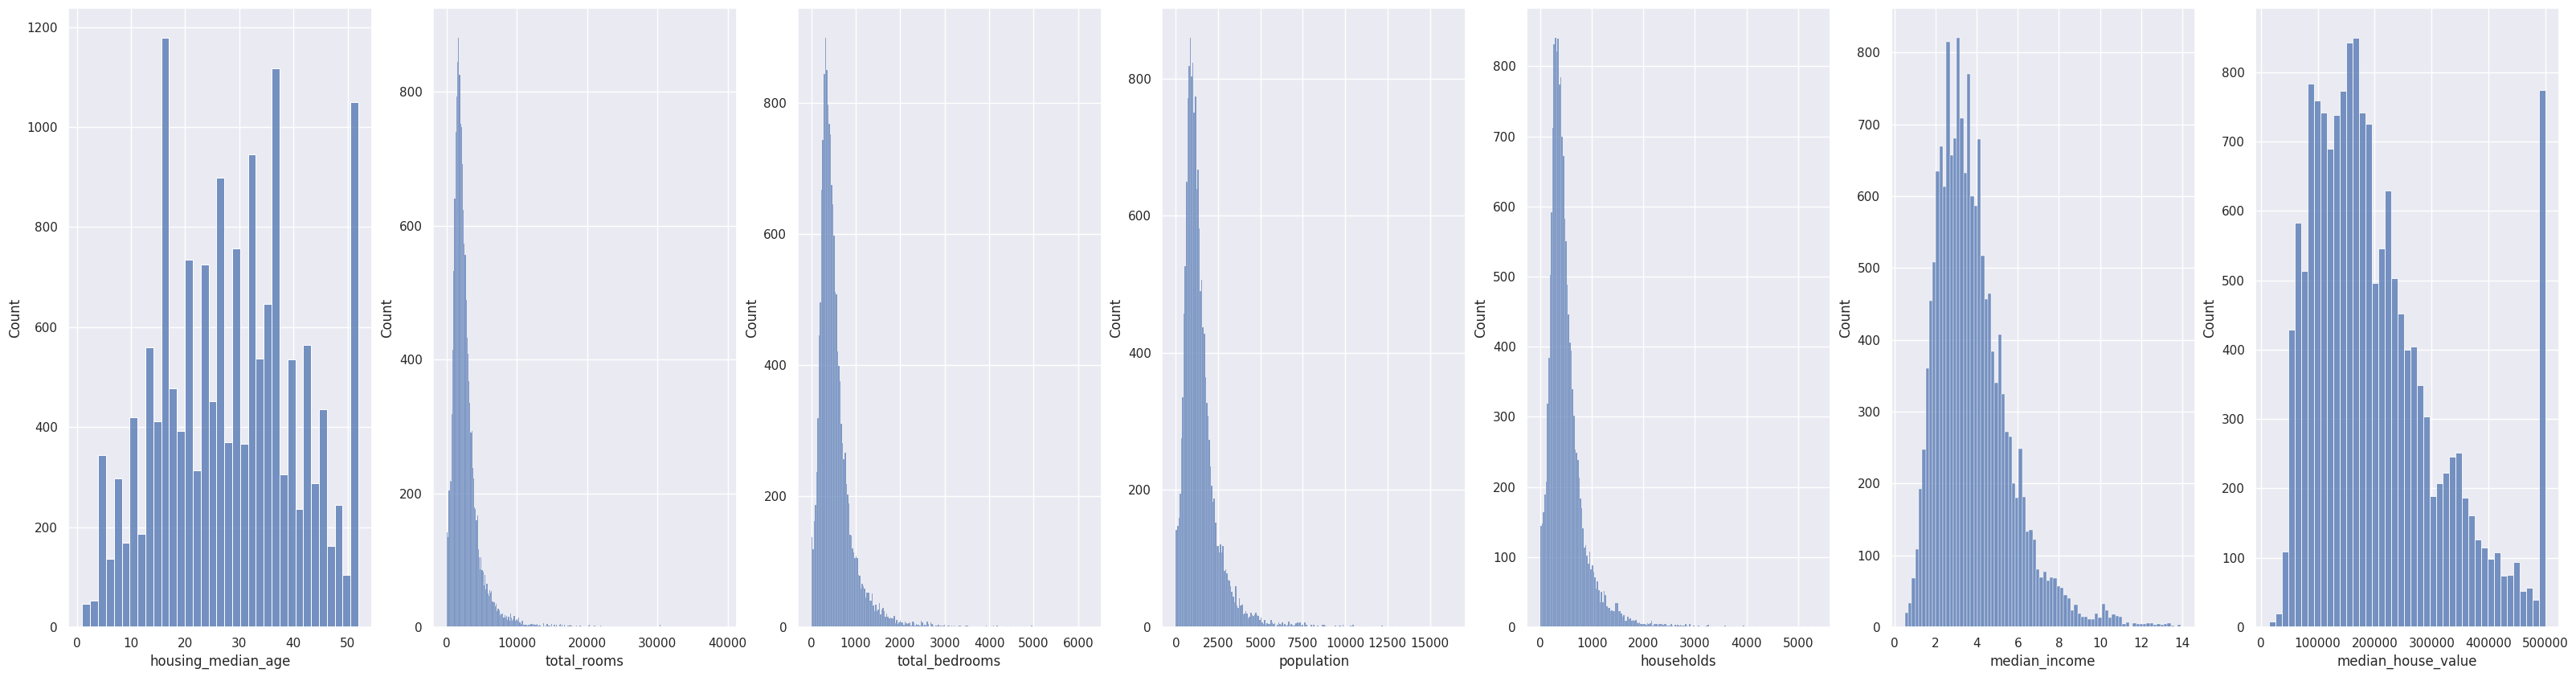

In [72]:
sns.set(rc={"figure.figsize":(40,10)},style='darkgrid')
fig, ax =plt.subplots(1,7)
sns.histplot(x=immo_df5["housing_median_age"], ax=ax[0])
sns.histplot(x=immo_df5["total_rooms"], ax=ax[1])
sns.histplot(x=immo_df5["total_bedrooms"], ax=ax[2])
sns.histplot(x=immo_df5["population"], ax=ax[3])
sns.histplot(x=immo_df5["households"], ax=ax[4])
sns.histplot(x=immo_df5["median_income"], ax=ax[5])
sns.histplot(x=immo_df5["median_house_value"], ax=ax[6])

## Export des données

In [73]:
immo_df5.to_csv('immo_iteration6.csv',index=False, encoding='utf-8')

 # 7 eme iteration

## reduction de feature: longitude

In [74]:
immo_df6= immo_df4.copy()

In [75]:
immo_df6=immo_df6.drop("longitude", axis=1)

In [76]:
immo_df6

index  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       2072.0     36.77                 6.0       1853.0           473.0   
1      10600.0     33.68                 8.0       2032.0           349.0   
2       2494.0     36.60                25.0        875.0           214.0   
3       4284.0     34.10                31.0        622.0           229.0   
4      16541.0     37.79                21.0       1922.0           373.0   
...        ...       ...                 ...          ...             ...   
16507   1099.0     39.59                20.0       1465.0           278.0   
16508  18898.0     38.11                49.0       2365.0           504.0   
16509  11798.0     38.92                19.0       2531.0           461.0   
16510   6637.0     34.16                39.0       2776.0           840.0   
16511   2575.0     40.80                31.0       2152.0           462.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
0          1397.0       417.0         1.4817                        0.0   
1           862.0       340.0         6.9133                        1.0   
2           931.0       214.0         1.5536                        0.0   
3           597.0       227.0         1.5284                        1.0   
4          1130.0       372.0         4.0815                        0.0   
...           ...         ...            ...                        ...   
16507       745.0       250.0         3.0625                        0.0   
16508      1131.0       458.0         2.6133                        0.0   
16509      1206.0       429.0         4.4958                        0.0   
16510      2546.0       773.0         2.5750                        1.0   
16511      1259.0       420.0         2.2478                        0.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         1.0                     0.0   
1                         0.0                     0.0   
2                         1.0                     0.0   
3                         0.0                     0.0   
4                         1.0                     0.0   
...                       ...                     ...   
16507                     1.0                     0.0   
16508                     0.0                     0.0   
16509                     1.0                     0.0   
16510                     0.0                     0.0   
16511                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   
...                         ...                         ...   
16507                       0.0                         0.0   
16508                       1.0                         0.0   
16509                       0.0                         0.0   
16510                       0.0                         0.0   
16511                       0.0                         1.0   

       median_house_value  
0                 72000.0  
1                274100.0  
2                 58300.0  
3                200000.0  
4                117900.0  
...                   ...  
16507             93800.0  
16508            103100.0  
16509            192600.0  
16510            153500.0  
16511             81100.0  

[16512 rows x 14 columns]

## Export des données

In [77]:
immo_df6.to_csv('immo_iteration7.csv',index=False, encoding='utf-8')

 # 8eme iteration

## reduction de feature: latitude

In [78]:
immo_df7= immo_df4.copy()

In [79]:
immo_df7=immo_df7.drop("latitude", axis=1)

In [80]:
immo_df7

index  longitude  housing_median_age  total_rooms  total_bedrooms  \
0       2072.0    -119.84                 6.0       1853.0           473.0   
1      10600.0    -117.80                 8.0       2032.0           349.0   
2       2494.0    -120.19                25.0        875.0           214.0   
3       4284.0    -118.32                31.0        622.0           229.0   
4      16541.0    -121.23                21.0       1922.0           373.0   
...        ...        ...                 ...          ...             ...   
16507   1099.0    -121.90                20.0       1465.0           278.0   
16508  18898.0    -122.25                49.0       2365.0           504.0   
16509  11798.0    -121.22                19.0       2531.0           461.0   
16510   6637.0    -118.14                39.0       2776.0           840.0   
16511   2575.0    -124.13                31.0       2152.0           462.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
0          1397.0       417.0         1.4817                        0.0   
1           862.0       340.0         6.9133                        1.0   
2           931.0       214.0         1.5536                        0.0   
3           597.0       227.0         1.5284                        1.0   
4          1130.0       372.0         4.0815                        0.0   
...           ...         ...            ...                        ...   
16507       745.0       250.0         3.0625                        0.0   
16508      1131.0       458.0         2.6133                        0.0   
16509      1206.0       429.0         4.4958                        0.0   
16510      2546.0       773.0         2.5750                        1.0   
16511      1259.0       420.0         2.2478                        0.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         1.0                     0.0   
1                         0.0                     0.0   
2                         1.0                     0.0   
3                         0.0                     0.0   
4                         1.0                     0.0   
...                       ...                     ...   
16507                     1.0                     0.0   
16508                     0.0                     0.0   
16509                     1.0                     0.0   
16510                     0.0                     0.0   
16511                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   
...                         ...                         ...   
16507                       0.0                         0.0   
16508                       1.0                         0.0   
16509                       0.0                         0.0   
16510                       0.0                         0.0   
16511                       0.0                         1.0   

       median_house_value  
0                 72000.0  
1                274100.0  
2                 58300.0  
3                200000.0  
4                117900.0  
...                   ...  
16507             93800.0  
16508            103100.0  
16509            192600.0  
16510            153500.0  
16511             81100.0  

[16512 rows x 14 columns]

## Export des données

In [81]:
immo_df7.to_csv('immo_iteration8.csv',index=False, encoding='utf-8')

 # 9eme iteration

## reduction de feature: 

In [82]:
immo_df8= immo_df4.copy()

In [83]:
immo_df8=immo_df8.drop("total_bedrooms", axis=1)

In [84]:
immo_df8=immo_df8.drop("households", axis=1)

In [85]:
immo_df8=immo_df8.drop("longitude", axis=1)

In [86]:
immo_df8=immo_df8.drop("total_rooms", axis=1)

In [87]:
immo_df8

index  latitude  housing_median_age  population  median_income  \
0       2072.0     36.77                 6.0      1397.0         1.4817   
1      10600.0     33.68                 8.0       862.0         6.9133   
2       2494.0     36.60                25.0       931.0         1.5536   
3       4284.0     34.10                31.0       597.0         1.5284   
4      16541.0     37.79                21.0      1130.0         4.0815   
...        ...       ...                 ...         ...            ...   
16507   1099.0     39.59                20.0       745.0         3.0625   
16508  18898.0     38.11                49.0      1131.0         2.6133   
16509  11798.0     38.92                19.0      1206.0         4.4958   
16510   6637.0     34.16                39.0      2546.0         2.5750   
16511   2575.0     40.80                31.0      1259.0         2.2478   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  median_house_value  
0                             0.0             72000.0  
1                             0.0            274100.0  
2                             0.0             58300.0  
3                             0.0            200000.0  
4                             0.0            117900.0  
...                           ...                 ...  
16507                         0.0             93800.0  
16508                         0.0            103100.0  
16509                         0.0            192600.0  
16510                         0.0            153500.0  
16511                         1.0             81100.0  

[16512 rows x 11 columns]

## Export des données

In [88]:
immo_df8.to_csv('immo_iteration9.csv',index=False, encoding='utf-8')

 # 10eme iteration

## reduction de feature: room_per_households

In [89]:
immo_df9= immo_df5.copy()

In [90]:
immo_df9['room_per_households']= immo_df9['total_rooms']/immo_df9['households']

In [91]:
immo_df9=immo_df9.drop("total_rooms", axis=1)

In [92]:
immo_df9=immo_df9.drop("households", axis=1)

In [93]:
immo_df9

index  longitude  latitude  housing_median_age  total_bedrooms  \
0       2072.0    -119.84     36.77                 6.0           473.0   
1      10600.0    -117.80     33.68                 8.0           349.0   
2       2494.0    -120.19     36.60                25.0           214.0   
3       4284.0    -118.32     34.10                31.0           229.0   
4      16541.0    -121.23     37.79                21.0           373.0   
...        ...        ...       ...                 ...             ...   
16507   1099.0    -121.90     39.59                20.0           278.0   
16508  18898.0    -122.25     38.11                49.0           504.0   
16509  11798.0    -121.22     38.92                19.0           461.0   
16510   6637.0    -118.14     34.16                39.0           840.0   
16511   2575.0    -124.13     40.80                31.0           462.0   

       population  median_income  ocean_proximity_<1H OCEAN  \
0          1397.0         1.4817                        0.0   
1           862.0         6.9133                        1.0   
2           931.0         1.5536                        0.0   
3           597.0         1.5284                        1.0   
4          1130.0         4.0815                        0.0   
...           ...            ...                        ...   
16507       745.0         3.0625                        0.0   
16508      1131.0         2.6133                        0.0   
16509      1206.0         4.4958                        0.0   
16510      2546.0         2.5750                        1.0   
16511      1259.0         2.2478                        0.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         1.0                     0.0   
1                         0.0                     0.0   
2                         1.0                     0.0   
3                         0.0                     0.0   
4                         1.0                     0.0   
...                       ...                     ...   
16507                     1.0                     0.0   
16508                     0.0                     0.0   
16509                     1.0                     0.0   
16510                     0.0                     0.0   
16511                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   
...                         ...                         ...   
16507                       0.0                         0.0   
16508                       1.0                         0.0   
16509                       0.0                         0.0   
16510                       0.0                         0.0   
16511                       0.0                         1.0   

       median_house_value  room_per_households  
0                 72000.0             4.443645  
1                274100.0             5.976471  
2                 58300.0             4.088785  
3                200000.0             2.740088  
4                117900.0             5.166667  
...                   ...                  ...  
16507             93800.0             5.860000  
16508            103100.0             5.163755  
16509            192600.0             5.899767  
16510            153500.0             3.591203  
16511             81100.0             5.123810  

[16467 rows x 14 columns]

## Export des données

In [94]:
immo_df9.to_csv('immo_iteration10.csv',index=False, encoding='utf-8')

 # 11eme iteration

## visualisation de la normalité 

In [95]:
import scs
from scipy.stats import norm

In [96]:
def var_hist(var, i):
    subset = immo_df9[var]
    n_dataset = len(immo_df9)
    xbar = np.mean(subset) # Moyenne
    sprime = np.std(subset, ddof=1) # Ecart-type
    sprime2 = np.var(subset, ddof=1) #Variance non biaisée
    ax = fig.add_subplot(i)
    ax.hist(subset, density=True)
    ax.axvline(xbar, color='r', linewidth=2, label="Moyenne empirique")
    bins = np.arange(subset.min(),subset.max(),0.05)
    y = norm.pdf(bins, xbar, sprime)
    ax.plot(bins, y, '--', label="Densité normale")
    ax.legend()
    ax.set_xlabel(var, fontsize=12)
    ax.set_ylabel('Densité', fontsize=12)
    ax.set_title('Distribution de '+str(var), fontsize=18)

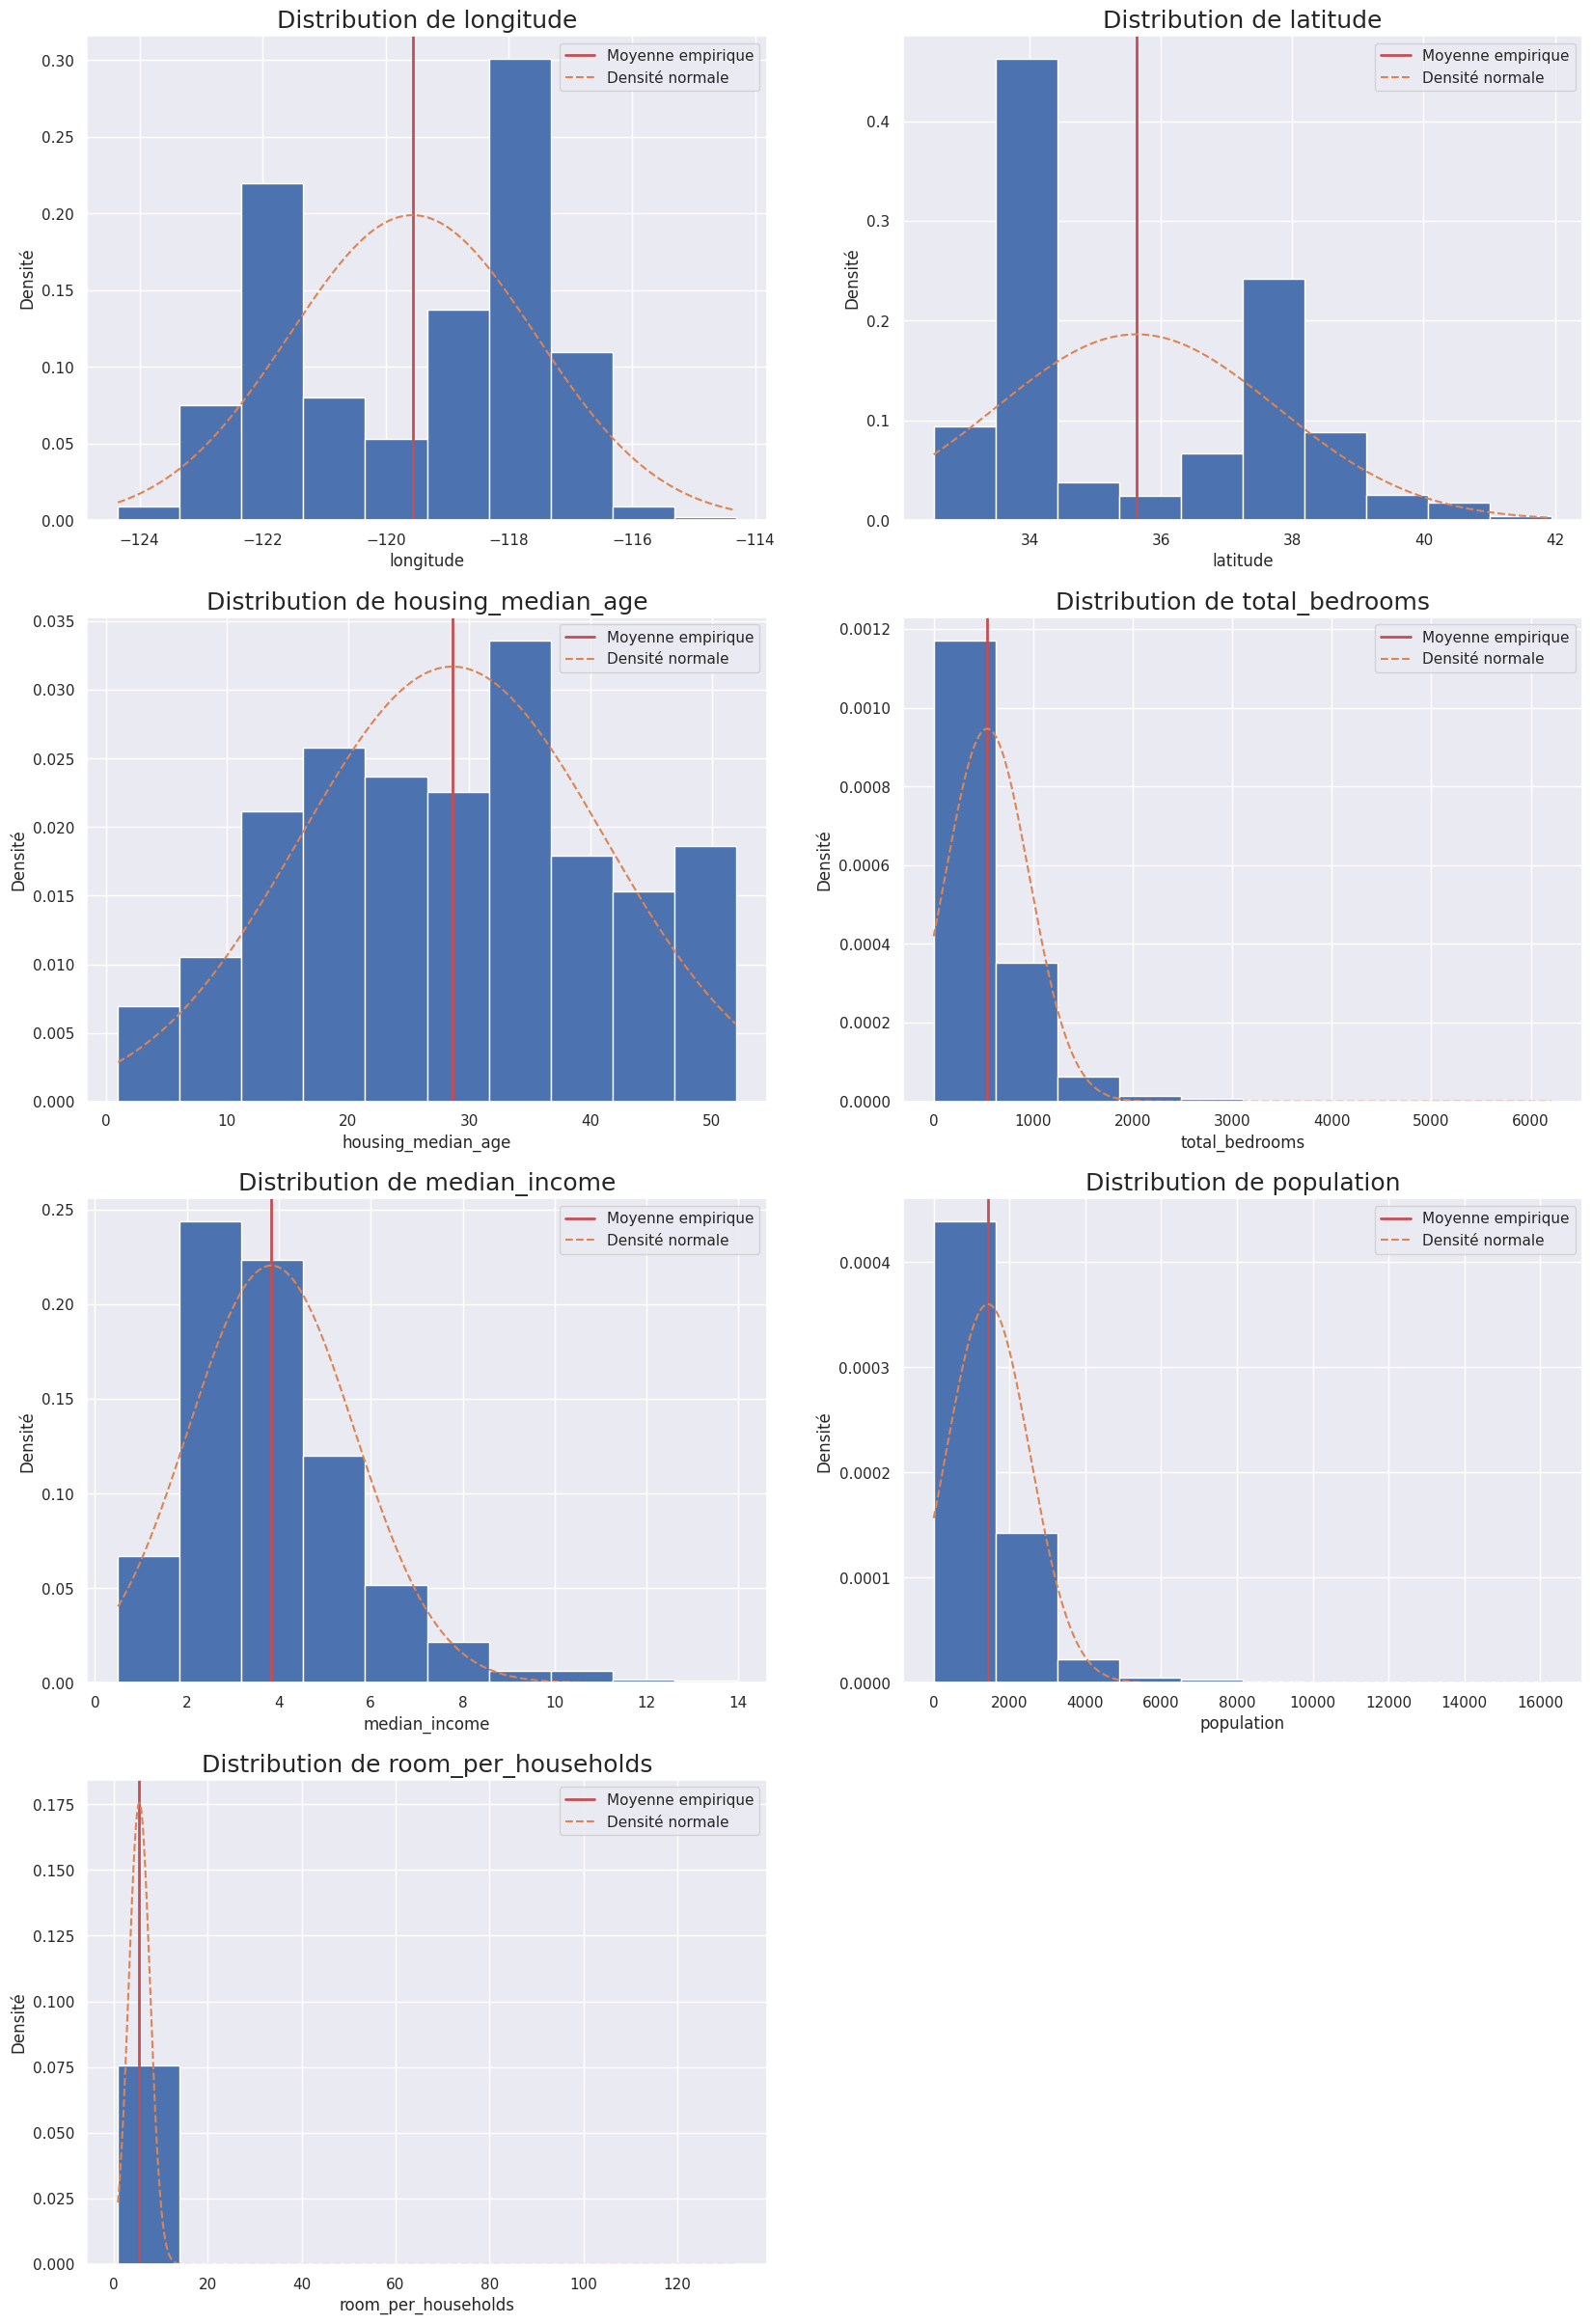

In [97]:

liste_var = ['longitude','latitude',
               'housing_median_age','total_bedrooms','median_income','population','room_per_households']

fig = plt.figure(figsize=(20,30),constrained_layout=False)
i = 421
for var in liste_var :
    var_hist(var, i)
    i+=1
plt.show()

## scaling (MinMaxScaler)

In [98]:
df_1 = immo_df9.filter(['index','longitude','latitude','housing_median_age','total_bedrooms','population','room_per_households','median_income','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'], axis=1).copy()

scaler = MinMaxScaler(feature_range=(0, 1))
df_2 = pd.DataFrame(scaler.fit_transform(df_1), columns = df_1.columns)
df_2

index  longitude  latitude  housing_median_age  total_bedrooms  \
0      0.100392   0.449203  0.449522            0.098039        0.075870   
1      0.513591   0.652390  0.121148            0.137255        0.055896   
2      0.120839   0.414343  0.431456            0.470588        0.034149   
3      0.207568   0.600598  0.165781            0.588235        0.036566   
4      0.801444   0.310757  0.557917            0.392157        0.059762   
...         ...        ...       ...                 ...             ...   
16462  0.053249   0.244024  0.749203            0.372549        0.044459   
16463  0.915645   0.209163  0.591923            0.941176        0.080863   
16464  0.571636   0.311753  0.678002            0.352941        0.073937   
16465  0.321576   0.618526  0.172157            0.745098        0.134987   
16466  0.124764   0.021912  0.877790            0.588235        0.074098   

       population  room_per_households  median_income  \
0        0.085511             0.027318       0.073012   
1        0.052693             0.038958       0.476936   
2        0.056926             0.024624       0.078359   
3        0.036437             0.014382       0.076485   
4        0.069133             0.032809       0.266347   
...           ...                  ...            ...   
16462    0.045516             0.038074       0.190569   
16463    0.069194             0.032787       0.157164   
16464    0.073795             0.038376       0.297157   
16465    0.155993             0.020845       0.154316   
16466    0.077046             0.032483       0.129983   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16462                        0.0                     1.0   
16463                        0.0                     0.0   
16464                        0.0                     1.0   
16465                        1.0                     0.0   
16466                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16462                     0.0                       0.0   
16463                     0.0                       1.0   
16464                     0.0                       0.0   
16465                     0.0                       0.0   
16466                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16462                         0.0  
16463                         0.0  
16464                         0.0  
16465                         0.0  
16466                         1.0  

[16467 rows x 13 columns]

## Export des données

In [99]:
df_2.to_csv('immo_iteration11.csv',index=False, encoding='utf-8')

## scaling (robust)

In [100]:
df_3 = immo_df9.filter(['index','longitude','latitude','housing_median_age','total_bedrooms','population','room_per_households','median_income','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'], axis=1).copy()

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_4 = pd.DataFrame(scaler.fit_transform(df_3), columns = df_3.columns)
df_4

index  longitude  latitude  housing_median_age  total_bedrooms  \
0     -0.799006  -0.357143  0.666667           -1.210526        0.108262   
1      0.031859   0.182540 -0.150794           -1.105263       -0.245014   
2     -0.757892  -0.449735  0.621693           -0.210526       -0.629630   
3     -0.583496   0.044974 -0.039683            0.105263       -0.586895   
4      0.610678  -0.724868  0.936508           -0.421053       -0.176638   
...         ...        ...       ...                 ...             ...   
16462 -0.893804  -0.902116  1.412698           -0.473684       -0.447293   
16463  0.840316  -0.994709  1.021164            1.052632        0.196581   
16464  0.148578  -0.722222  1.235450           -0.526316        0.074074   
16465 -0.354248   0.092593 -0.023810            0.526316        1.153846   
16466 -0.750000  -1.492063  1.732804            0.105263        0.076923   

       population  room_per_households  median_income  \
0        0.240126            -0.486327      -0.946324   
1       -0.323328             0.472342       1.567026   
2       -0.250658            -0.708266      -0.913054   
3       -0.602422            -1.551776      -0.924714   
4       -0.041074            -0.034131       0.256675   
...           ...                  ...            ...   
16462   -0.446551             0.399498      -0.214844   
16463   -0.040021            -0.035952      -0.422701   
16464    0.038968             0.424369       0.448383   
16465    1.450237            -1.019467      -0.440424   
16466    0.094787            -0.060935      -0.591828   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16462                        0.0                     1.0   
16463                        0.0                     0.0   
16464                        0.0                     1.0   
16465                        1.0                     0.0   
16466                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16462                     0.0                       0.0   
16463                     0.0                       1.0   
16464                     0.0                       0.0   
16465                     0.0                       0.0   
16466                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  
...                           ...  
16462                         0.0  
16463                         0.0  
16464                         0.0  
16465                         0.0  
16466                         1.0  

[16467 rows x 13 columns]

## Export des données

In [101]:
df_4.to_csv('immo_iteration12.csv',index=False, encoding='utf-8')

## scaling  median income / 

In [102]:
df_5 = immo_df9.filter(['housing_median_age','total_bedrooms','population','room_per_households','median_income',''], axis=1).copy()

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_6 = pd.DataFrame(scaler.fit_transform(df_5), columns = df_5.columns)
df_6

housing_median_age  total_bedrooms  population  room_per_households  \
0               -1.210526        0.108262    0.240126            -0.486327   
1               -1.105263       -0.245014   -0.323328             0.472342   
2               -0.210526       -0.629630   -0.250658            -0.708266   
3                0.105263       -0.586895   -0.602422            -1.551776   
4               -0.421053       -0.176638   -0.041074            -0.034131   
...                   ...             ...         ...                  ...   
16462           -0.473684       -0.447293   -0.446551             0.399498   
16463            1.052632        0.196581   -0.040021            -0.035952   
16464           -0.526316        0.074074    0.038968             0.424369   
16465            0.526316        1.153846    1.450237            -1.019467   
16466            0.105263        0.076923    0.094787            -0.060935   

       median_income  
0          -0.946324  
1           1.567026  
2          -0.913054  
3          -0.924714  
4           0.256675  
...              ...  
16462      -0.214844  
16463      -0.422701  
16464       0.448383  
16465      -0.440424  
16466      -0.591828  

[16467 rows x 5 columns]

In [103]:
df7 = immo_df9[['index','longitude','latitude','ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','median_house_value']]
df7.reset_index(inplace=True, drop=False)


In [104]:
df7 = df7.drop("level_0", axis=1)

In [105]:
immo_df10 = df7.join(df_6)
immo_df10

index  longitude  latitude  ocean_proximity_<1H OCEAN  \
0       2072.0    -119.84     36.77                        0.0   
1      10600.0    -117.80     33.68                        1.0   
2       2494.0    -120.19     36.60                        0.0   
3       4284.0    -118.32     34.10                        1.0   
4      16541.0    -121.23     37.79                        0.0   
...        ...        ...       ...                        ...   
16462   1099.0    -121.90     39.59                        0.0   
16463  18898.0    -122.25     38.11                        0.0   
16464  11798.0    -121.22     38.92                        0.0   
16465   6637.0    -118.14     34.16                        1.0   
16466   2575.0    -124.13     40.80                        0.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         1.0                     0.0   
1                         0.0                     0.0   
2                         1.0                     0.0   
3                         0.0                     0.0   
4                         1.0                     0.0   
...                       ...                     ...   
16462                     1.0                     0.0   
16463                     0.0                     0.0   
16464                     1.0                     0.0   
16465                     0.0                     0.0   
16466                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   
...                         ...                         ...   
16462                       0.0                         0.0   
16463                       1.0                         0.0   
16464                       0.0                         0.0   
16465                       0.0                         0.0   
16466                       0.0                         1.0   

       median_house_value  housing_median_age  total_bedrooms  population  \
0                 72000.0           -1.210526        0.108262    0.240126   
1                274100.0           -1.105263       -0.245014   -0.323328   
2                 58300.0           -0.210526       -0.629630   -0.250658   
3                200000.0            0.105263       -0.586895   -0.602422   
4                117900.0           -0.421053       -0.176638   -0.041074   
...                   ...                 ...             ...         ...   
16462             93800.0           -0.473684       -0.447293   -0.446551   
16463            103100.0            1.052632        0.196581   -0.040021   
16464            192600.0           -0.526316        0.074074    0.038968   
16465            153500.0            0.526316        1.153846    1.450237   
16466             81100.0            0.105263        0.076923    0.094787   

       room_per_households  median_income  
0                -0.486327      -0.946324  
1                 0.472342       1.567026  
2                -0.708266      -0.913054  
3                -1.551776      -0.924714  
4                -0.034131       0.256675  
...                    ...            ...  
16462             0.399498      -0.214844  
16463            -0.035952      -0.422701  
16464             0.424369       0.448383  
16465            -1.019467      -0.440424  
16466            -0.060935      -0.591828  

[16467 rows x 14 columns]

## Export des données

In [106]:
immo_df10.to_csv('immo_iteration13.csv',index=False, encoding='utf-8')

## log

In [107]:
immo_df11=immo_df9.copy()

In [108]:
immo_df11['total_bedrooms_log'] = np.log(immo_df11['total_bedrooms'])

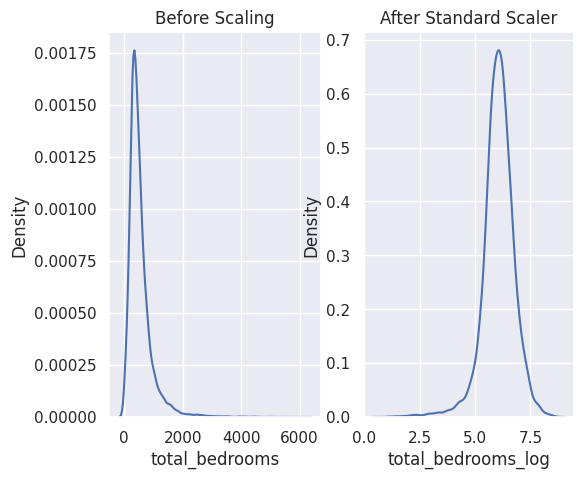

In [109]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(immo_df11['total_bedrooms'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(immo_df11['total_bedrooms_log'], ax=ax2)
plt.show()

In [110]:
'population','room_per_households'

('population', 'room_per_households')

In [111]:
immo_df11['median_income_log'] = np.log(immo_df11['median_income'])

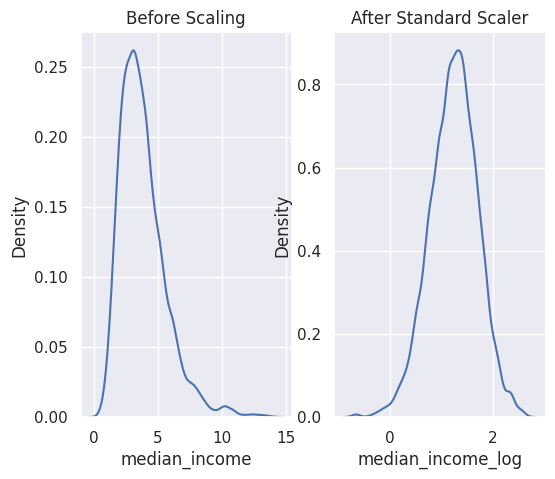

In [112]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(immo_df11['median_income'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(immo_df11['median_income_log'], ax=ax2)
plt.show()

In [113]:
'room_per_households'

'room_per_households'

In [114]:
immo_df11['population_log'] = np.log(immo_df11['population'])

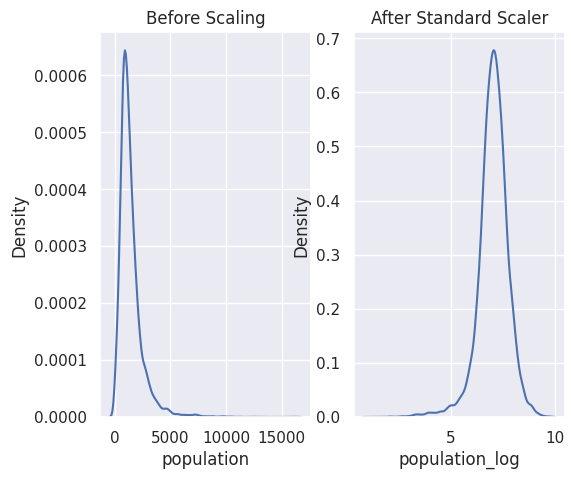

In [115]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(immo_df11['population'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(immo_df11['population_log'], ax=ax2)
plt.show()

In [116]:
immo_df11['room_per_households_log'] = np.log(immo_df11['room_per_households'])

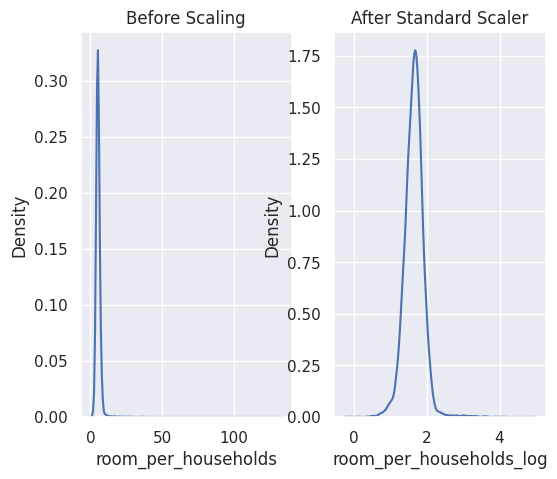

In [117]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(immo_df11['room_per_households'], ax=ax1)
ax2.set_title('After Standard Scaler')
sns.kdeplot(immo_df11['room_per_households_log'], ax=ax2)
plt.show()

In [118]:
immo_df11

index  longitude  latitude  housing_median_age  total_bedrooms  \
0       2072.0    -119.84     36.77                 6.0           473.0   
1      10600.0    -117.80     33.68                 8.0           349.0   
2       2494.0    -120.19     36.60                25.0           214.0   
3       4284.0    -118.32     34.10                31.0           229.0   
4      16541.0    -121.23     37.79                21.0           373.0   
...        ...        ...       ...                 ...             ...   
16507   1099.0    -121.90     39.59                20.0           278.0   
16508  18898.0    -122.25     38.11                49.0           504.0   
16509  11798.0    -121.22     38.92                19.0           461.0   
16510   6637.0    -118.14     34.16                39.0           840.0   
16511   2575.0    -124.13     40.80                31.0           462.0   

       population  median_income  ocean_proximity_<1H OCEAN  \
0          1397.0         1.4817                        0.0   
1           862.0         6.9133                        1.0   
2           931.0         1.5536                        0.0   
3           597.0         1.5284                        1.0   
4          1130.0         4.0815                        0.0   
...           ...            ...                        ...   
16507       745.0         3.0625                        0.0   
16508      1131.0         2.6133                        0.0   
16509      1206.0         4.4958                        0.0   
16510      2546.0         2.5750                        1.0   
16511      1259.0         2.2478                        0.0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         1.0                     0.0   
1                         0.0                     0.0   
2                         1.0                     0.0   
3                         0.0                     0.0   
4                         1.0                     0.0   
...                       ...                     ...   
16507                     1.0                     0.0   
16508                     0.0                     0.0   
16509                     1.0                     0.0   
16510                     0.0                     0.0   
16511                     0.0                     0.0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  \
0                           0.0                         0.0   
1                           0.0                         0.0   
2                           0.0                         0.0   
3                           0.0                         0.0   
4                           0.0                         0.0   
...                         ...                         ...   
16507                       0.0                         0.0   
16508                       1.0                         0.0   
16509                       0.0                         0.0   
16510                       0.0                         0.0   
16511                       0.0                         1.0   

       median_house_value  room_per_households  total_bedrooms_log  \
0                 72000.0             4.443645            6.159095   
1                274100.0             5.976471            5.855072   
2                 58300.0             4.088785            5.365976   
3                200000.0             2.740088            5.433722   
4                117900.0             5.166667            5.921578   
...                   ...                  ...                 ...   
16507             93800.0             5.860000            5.627621   
16508            103100.0             5.163755            6.222576   
16509            192600.0             5.899767            6.133398   
16510            153500.0             3.591203            6.733402   
16511             81100.0             5.123810            6.135565   

       median_income_log  population_log  room_per_households_log  


In [119]:
immo_df11= immo_df11.drop("total_bedrooms", axis=1)

In [120]:
immo_df11= immo_df11.drop("median_income", axis=1)

In [121]:
immo_df11= immo_df11.drop("population", axis=1)

In [122]:
immo_df11= immo_df11.drop("room_per_households", axis=1)

In [123]:
immo_df11

index  longitude  latitude  housing_median_age  \
0       2072.0    -119.84     36.77                 6.0   
1      10600.0    -117.80     33.68                 8.0   
2       2494.0    -120.19     36.60                25.0   
3       4284.0    -118.32     34.10                31.0   
4      16541.0    -121.23     37.79                21.0   
...        ...        ...       ...                 ...   
16507   1099.0    -121.90     39.59                20.0   
16508  18898.0    -122.25     38.11                49.0   
16509  11798.0    -121.22     38.92                19.0   
16510   6637.0    -118.14     34.16                39.0   
16511   2575.0    -124.13     40.80                31.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  median_house_value  total_bedrooms_log  \
0                             0.0             72000.0            6.159095   
1                             0.0            274100.0            5.855072   
2                             0.0             58300.0            5.365976   
3                             0.0            200000.0            5.433722   
4                             0.0            117900.0            5.921578   
...                           ...                 ...                 ...   
16507                         0.0             93800.0            5.627621   
16508                         0.0            103100.0            6.222576   
16509                         0.0            192600.0            6.133398   
16510                         0.0            153500.0            6.733402   
16511                         1.0             81100.0            6.135565   

       median_income_log  population_log  room_per_households_log  
0               0.393190        7.242082                 1.491475  
1               1.933447        6.759255                 1.787830  
2               0.440575        6.836259                 1.408248  
3               0.424221        6.391917                 1.007990  
4               1.406465        7.029973                 1.642228  
...                  ...             ...                      ...  
16507           1.119232        6.613384                 1.768150  
16508           0.960614        7.030857                 1.641664  
16509           1.503144        7.095064                 1.774913  
16510           0.945850        7.842279                 1.278487  
16511           0.809952        7.138073                 1.633898  

[16467 rows x 14 columns]

## Export des données

In [124]:
immo_df11.to_csv('immo_iteration14.csv',index=False, encoding='utf-8')

## log

In [125]:
immo_df12=immo_df11.copy()

In [126]:
immo_df12['median_house_value_log'] = np.log(immo_df12['median_house_value'])

In [127]:
immo_df12= immo_df12.drop("median_house_value", axis=1)

In [128]:
immo_df12

index  longitude  latitude  housing_median_age  \
0       2072.0    -119.84     36.77                 6.0   
1      10600.0    -117.80     33.68                 8.0   
2       2494.0    -120.19     36.60                25.0   
3       4284.0    -118.32     34.10                31.0   
4      16541.0    -121.23     37.79                21.0   
...        ...        ...       ...                 ...   
16507   1099.0    -121.90     39.59                20.0   
16508  18898.0    -122.25     38.11                49.0   
16509  11798.0    -121.22     38.92                19.0   
16510   6637.0    -118.14     34.16                39.0   
16511   2575.0    -124.13     40.80                31.0   

       ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
0                            0.0                     1.0   
1                            1.0                     0.0   
2                            0.0                     1.0   
3                            1.0                     0.0   
4                            0.0                     1.0   
...                          ...                     ...   
16507                        0.0                     1.0   
16508                        0.0                     0.0   
16509                        0.0                     1.0   
16510                        1.0                     0.0   
16511                        0.0                     0.0   

       ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
16507                     0.0                       0.0   
16508                     0.0                       1.0   
16509                     0.0                       0.0   
16510                     0.0                       0.0   
16511                     0.0                       0.0   

       ocean_proximity_NEAR OCEAN  total_bedrooms_log  median_income_log  \
0                             0.0            6.159095           0.393190   
1                             0.0            5.855072           1.933447   
2                             0.0            5.365976           0.440575   
3                             0.0            5.433722           0.424221   
4                             0.0            5.921578           1.406465   
...                           ...                 ...                ...   
16507                         0.0            5.627621           1.119232   
16508                         0.0            6.222576           0.960614   
16509                         0.0            6.133398           1.503144   
16510                         0.0            6.733402           0.945850   
16511                         1.0            6.135565           0.809952   

       population_log  room_per_households_log  median_house_value_log  
0            7.242082                 1.491475               11.184421  
1            6.759255                 1.787830               12.521248  
2            6.836259                 1.408248               10.973357  
3            6.391917                 1.007990               12.206073  
4            7.029973                 1.642228               11.677592  
...               ...                      ...                     ...  
16507        6.613384                 1.768150               11.448920  
16508        7.030857                 1.641664               11.543455  
16509        7.095064                 1.774913               12.168371  
16510        7.842279                 1.278487               11.941456  
16511        7.138073                 1.633898               11.303438  

[16467 rows x 14 columns]

## Export des données

In [129]:
immo_df12.to_csv('immo_iteration15.csv',index=False, encoding='utf-8')